In [1]:
from proteus.iproteus import * 
from proteus import default_n, default_s, default_so
Profiling.logLevel=5
Profiling.verbose=False

In [2]:
import variable_density2D.guermond_example_variable_density_so as so
display_src(so)

```Python
from proteus.default_so import *
from proteus import Context
import guermond_example_variable_density
Context.setFromModule(guermond_example_variable_density)
ctx = Context.get()

pnList = [("mom_p", "mom_n"),
          ("rho_p", "rho_n")]

name = "guermond_example_variable_density_p"

systemStepControllerType = Sequential_MinAdaptiveModelStep

needEBQ_GLOBAL = False
needEBQ = False

tnList = ctx.tnList

```


In [3]:
from proteus import Comm
import os
from importlib import import_module

pList=[]
nList=[]
so.sList=[]
for (p,n) in so.pnList:
    so.sList.append(default_s)
    pList.append(import_module('variable_density2D.'+p))
    nList.append(import_module('variable_density2D.'+n))
    pList[-1].name = p
opts.save_dof = True
opts.dataDir='.'
opts.probDir='.'
Profiling.logLevel=3
Profiling.verbose=False

In [4]:
ns = NumericalSolution.NS_base(so, pList, nList, so.sList, opts)
ns.calculateSolution('run1')

TriangleBaseMesh nbase=1 baseFlags= q30DenA 
flags =  q30DenA  must have p, appending
fluxBoundaryCondition_components set([0, 1, 2])
fluxBoundaryCondition_components set([0])


False

Import all the packages and tools needed to plot and analyze the solutions

In [5]:
import numpy as np

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

import matplotlib
matplotlib.use('svg')
%matplotlib inline
# matplotlib.pylab.rcParams['figure.figsize'] = 16, 12
from matplotlib import  pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from tables import openFile

Calculate the maximal values and maximal errors of computed quantities for plotting below

In [6]:

# initialize the values to be calculated        
velocity_max = -float("inf")  
velocity_min = float("inf")
pressure_max = -float("inf")
pressure_min = float("inf")
density_max = -float("inf")
density_min = float("inf")

velocity_diff_max = -float("inf")
velocity_diff_min = float("inf")
pressure_diff_max = -float("inf")
pressure_diff_min = float("inf")
density_diff_max = -float("inf")
density_diff_min = float("inf")

# loop through solutions and calculate the errors and extrema
for i in np.arange(len(so.ctx.tnList)):
    h5=openFile("guermond_example_variable_density_p0.h5","r")        
    t = so.ctx.tnList[i]
    xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
    n = xvals.shape[0]
    
    u = h5.getNode("/u%i" %i)[:n]
    u_true = so.ctx.utrue(xvals,t)
    v = h5.getNode("/v%i" %i)[:n]
    v_true = so.ctx.vtrue(xvals,t)
    p = h5.getNode("/p%i" %i)[:]
    p_true = so.ctx.ptrue(xvals,t)
    rho = h5.getNode("/rho%i" %i)[:n]
    rho_true = so.ctx.rhotrue(xvals,t)
    
    u_diff = u-u_true
    v_diff = v-v_true
    p_diff = p-p_true
    rho_diff = rho-rho_true
    
    h5.close()

    # calculate the max and minima over entire solution output time
    velocity_max = max(velocity_max, max(u), max(v))        
    velocity_min = min(velocity_min, min(u), min(v)) 
    pressure_max = max(pressure_max, max(p))
    pressure_min = min(pressure_min, min(p)) 
    density_max = max(density_max, max(rho))
    density_min = min(density_min, min(rho)) 

    # calculate maximal errors
    velocity_diff_max = max(velocity_diff_max, max(u_diff), max(v_diff))
    velocity_diff_min = min(velocity_diff_min, min(u_diff), min(v_diff))

    pressure_diff_max = max(pressure_diff_max, max(p_diff))
    pressure_diff_min = min(pressure_diff_min, min(p_diff))

    density_diff_max = max(density_diff_max, max(rho_diff))
    density_diff_min = min(density_diff_min, min(rho_diff))

# now we have errors calculated, output them
print "max velocity = %2.4f,\t min velocity = %2.4f" %(velocity_max, velocity_min)
print "max pressure = %2.4f,\t min pressure = %2.4f" %(pressure_max, pressure_min)
print "max density = %2.4f,\t min density = %2.4f" %(density_max, density_min)

print "Discrete maximum norms (evaluated at nodal points):"
print "\t||v||_{max}\t= %2.4e" %max(np.abs(velocity_diff_max),np.abs(velocity_diff_min))
print "\t||p||_{max}\t= %2.4e" %max(np.abs(pressure_diff_max),np.abs(pressure_diff_min))
print "\t||rho||_{max}\t= %2.4e" %max(np.abs(density_diff_max),np.abs(density_diff_min))



max velocity = 1.0000,	 min velocity = -1.0000
max pressure = 0.4209,	 min pressure = -0.4209
max density = 3.0000,	 min density = 1.0000
Discrete maximum norms (evaluated at nodal points):
	||v||_{max}	= 6.5831e-03
	||p||_{max}	= 1.8157e-02
	||rho||_{max}	= 4.3719e-02


Plot velocity and pressure


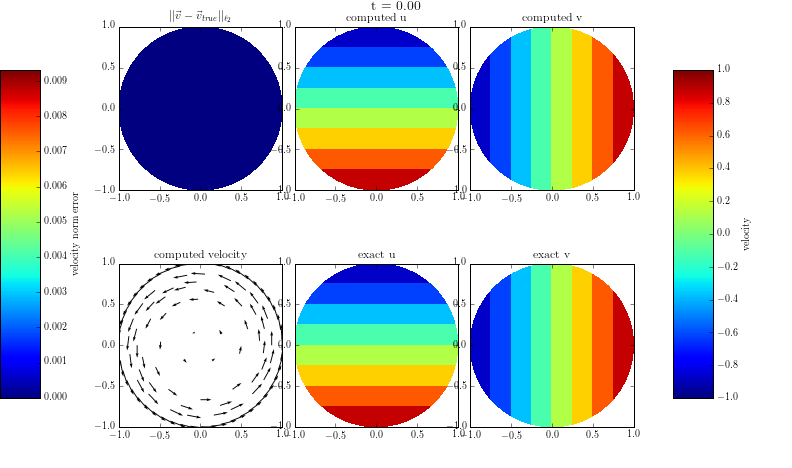
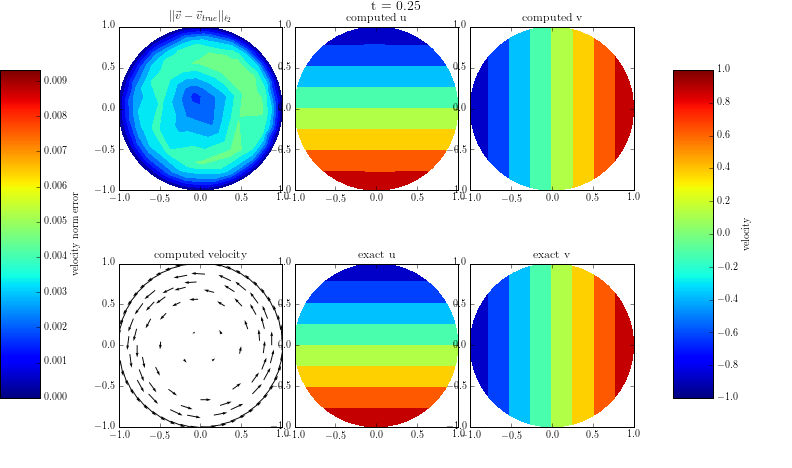
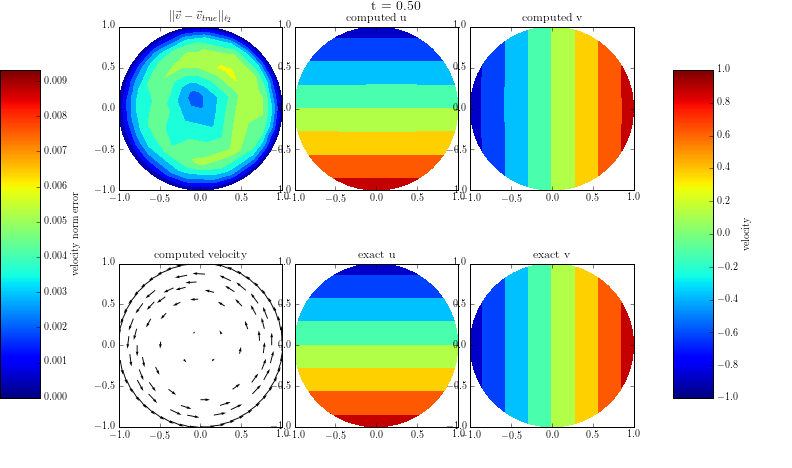
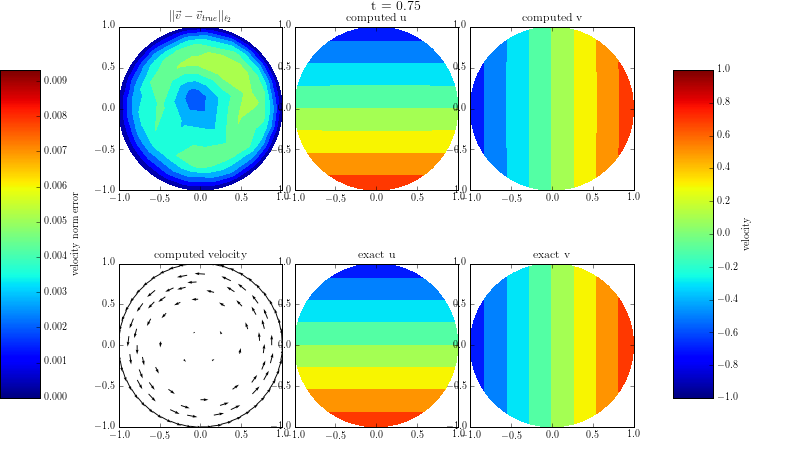
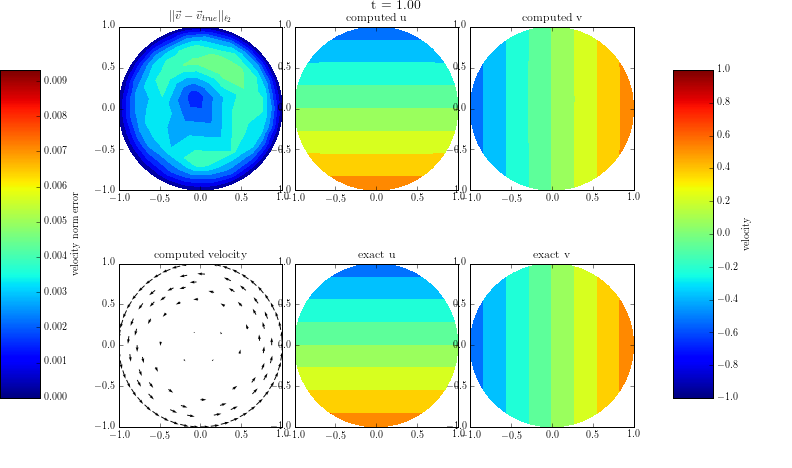
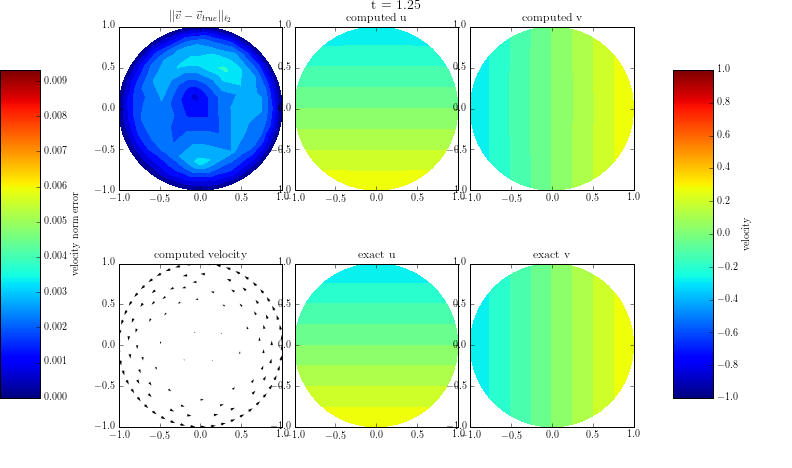
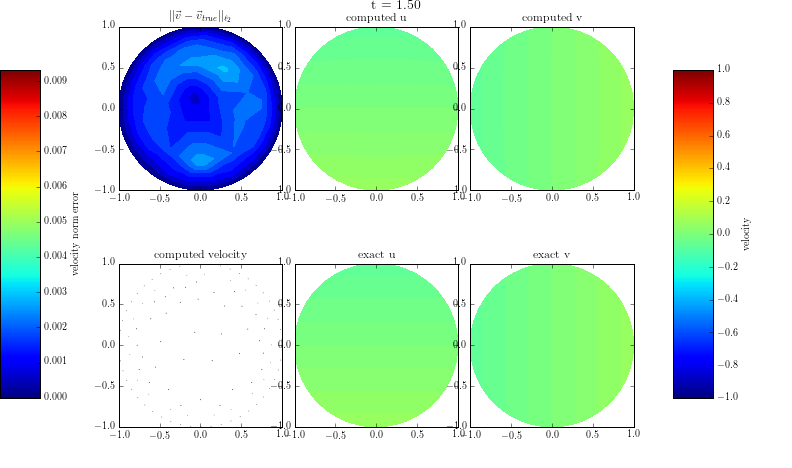
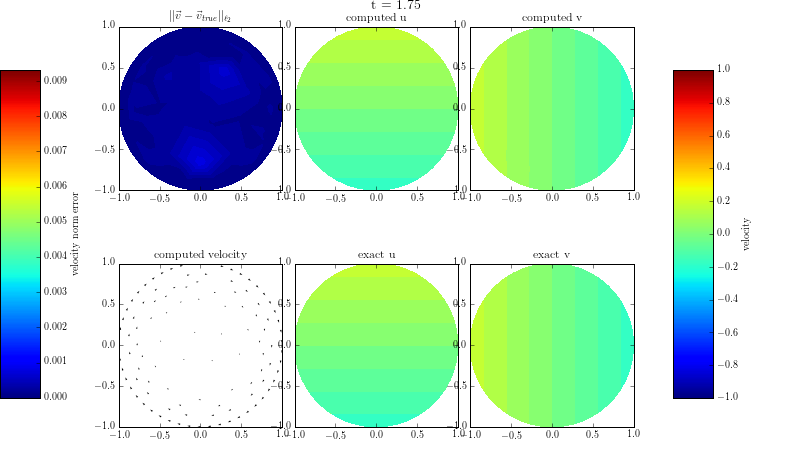
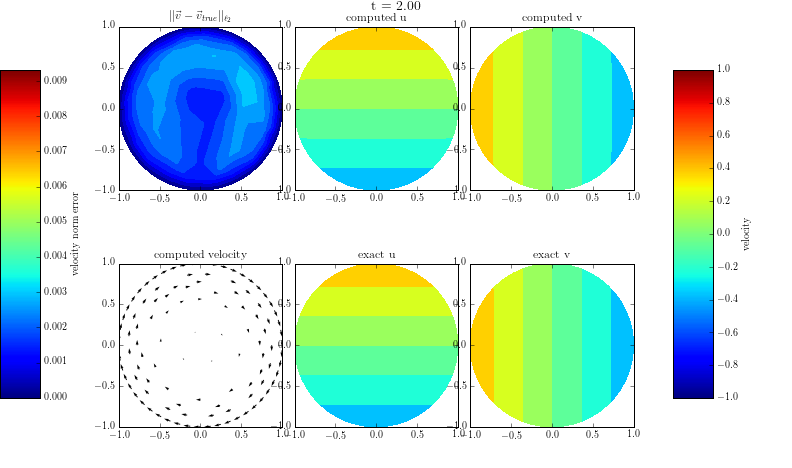
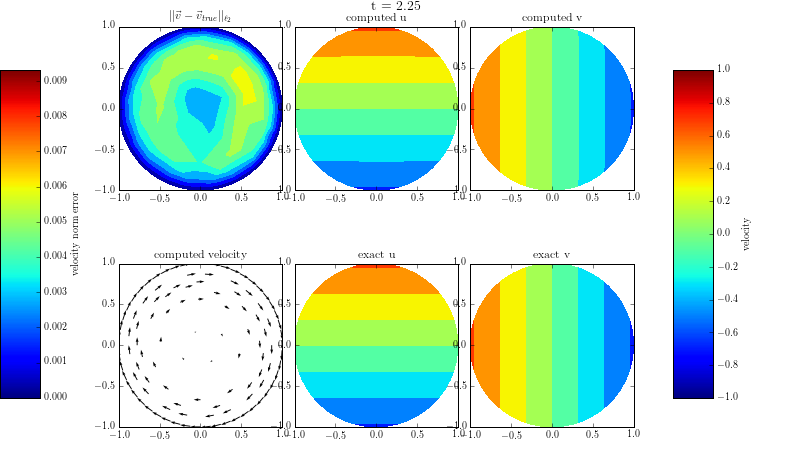
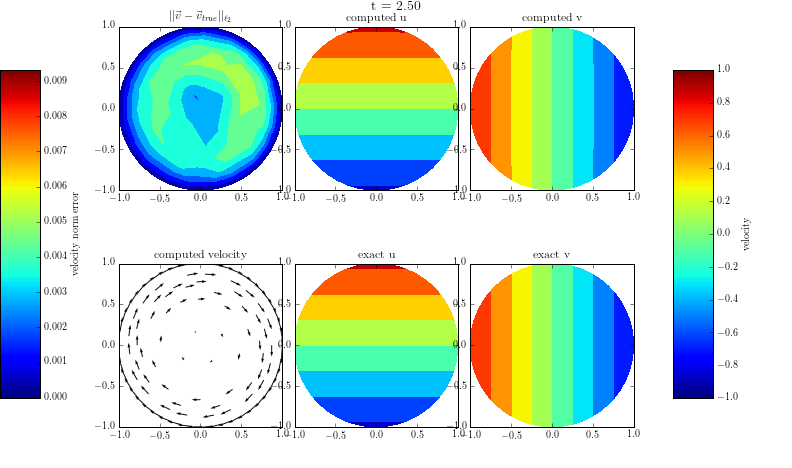
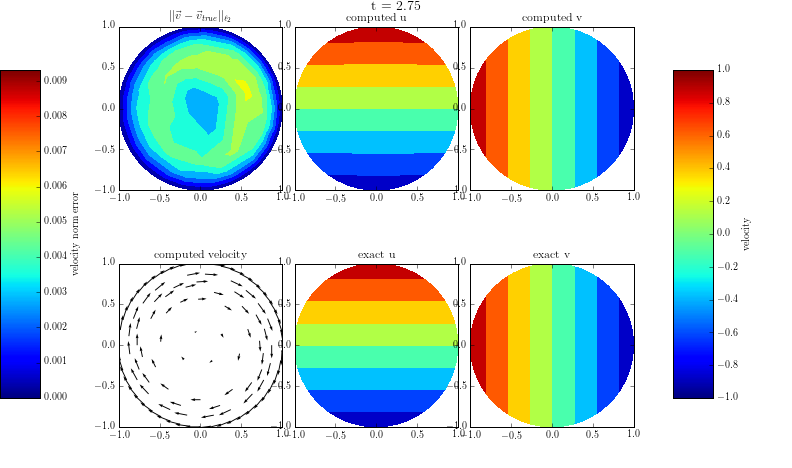
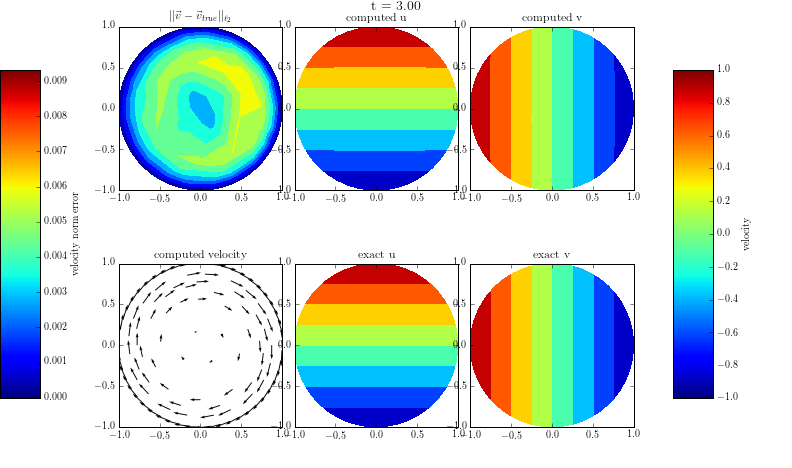
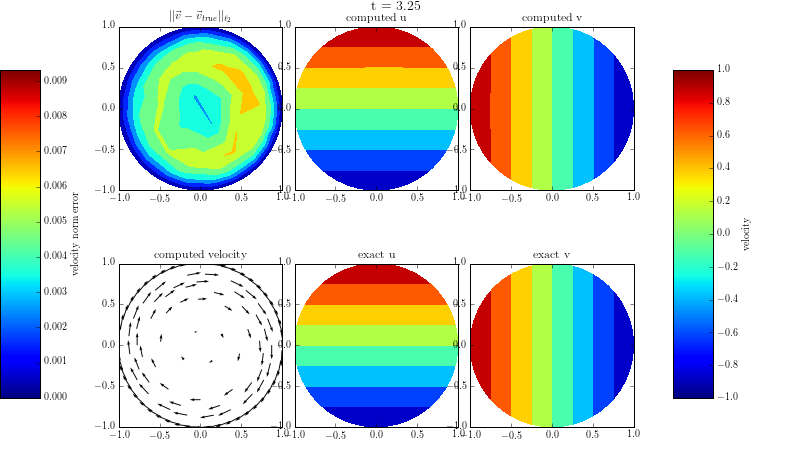
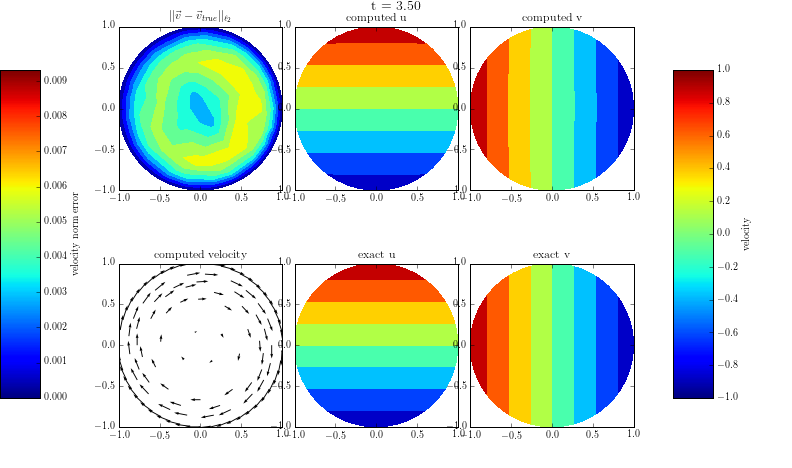
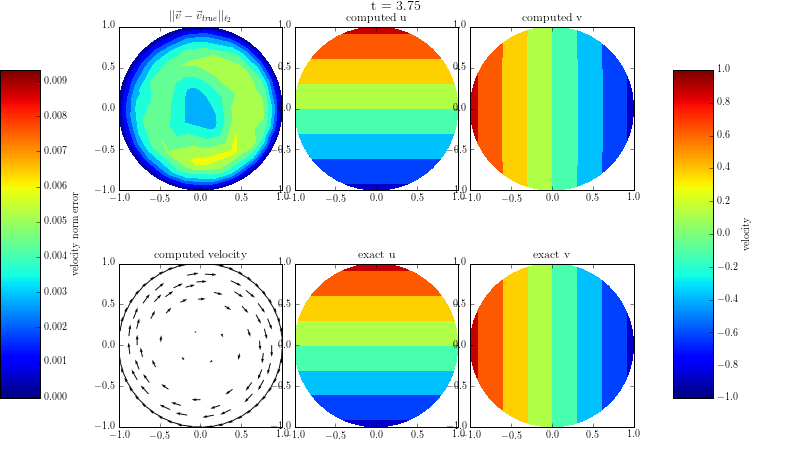
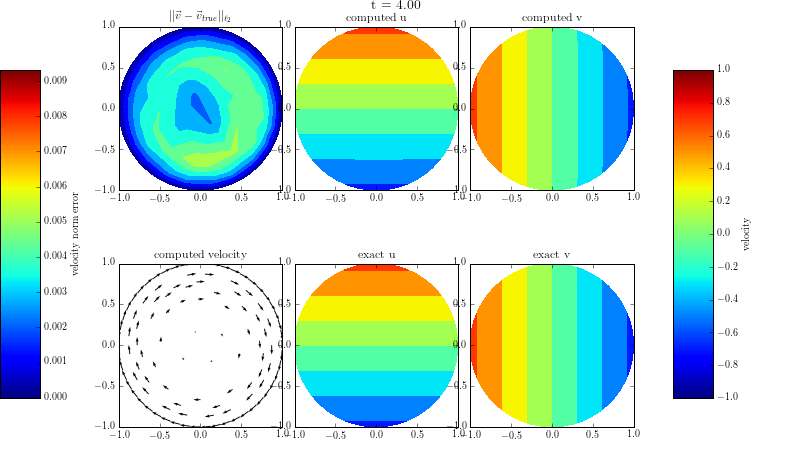
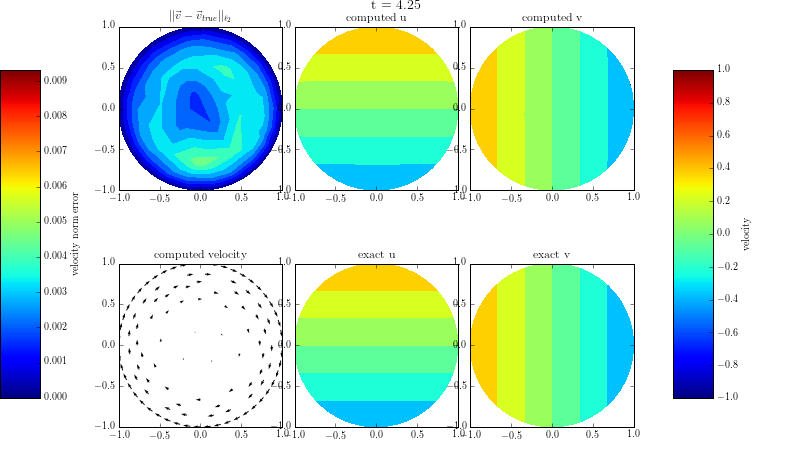
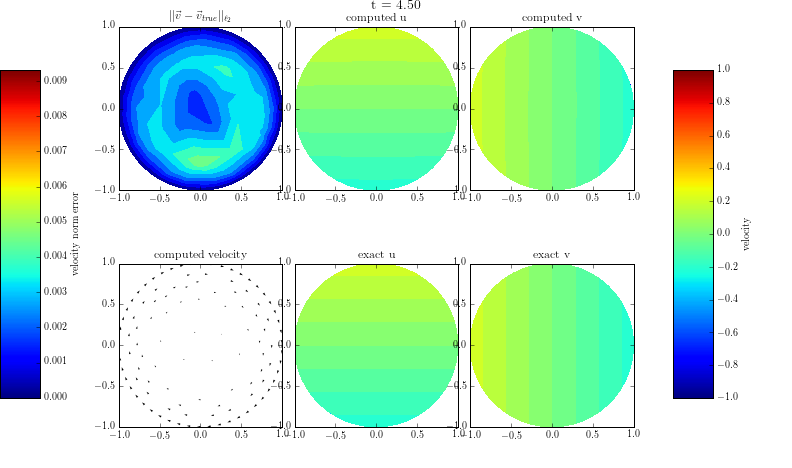
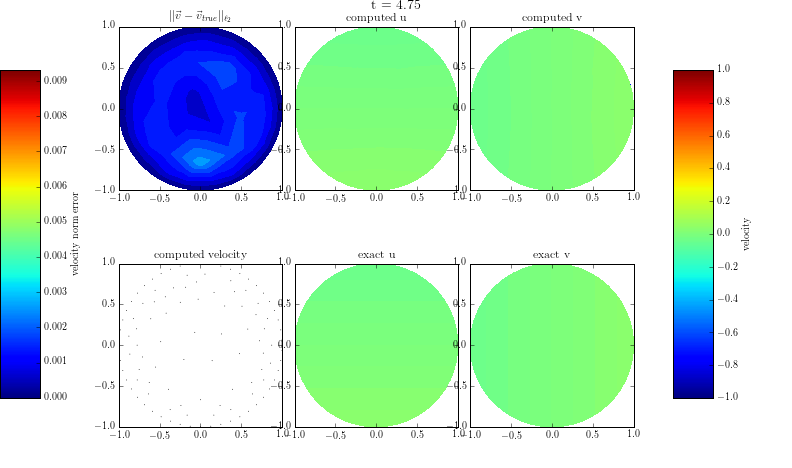
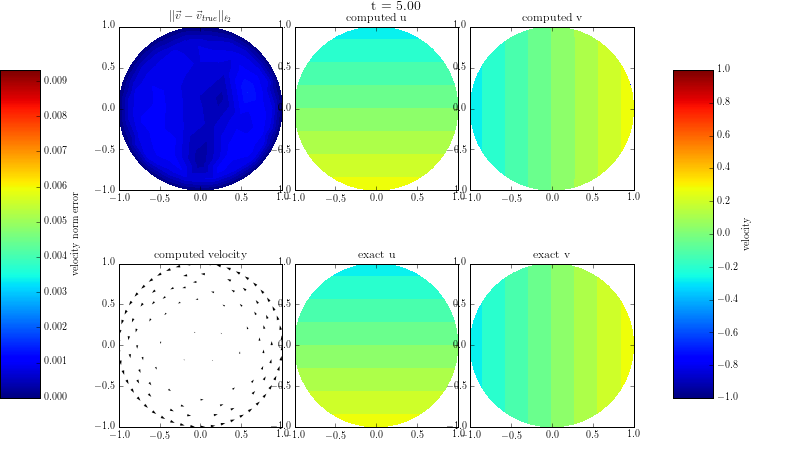
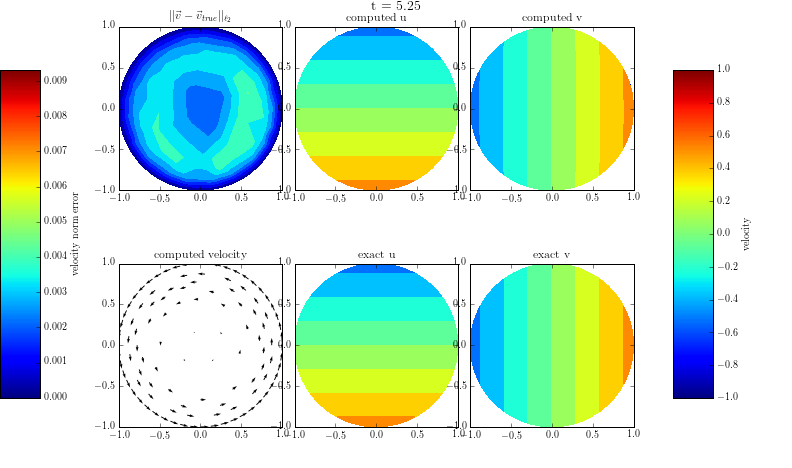
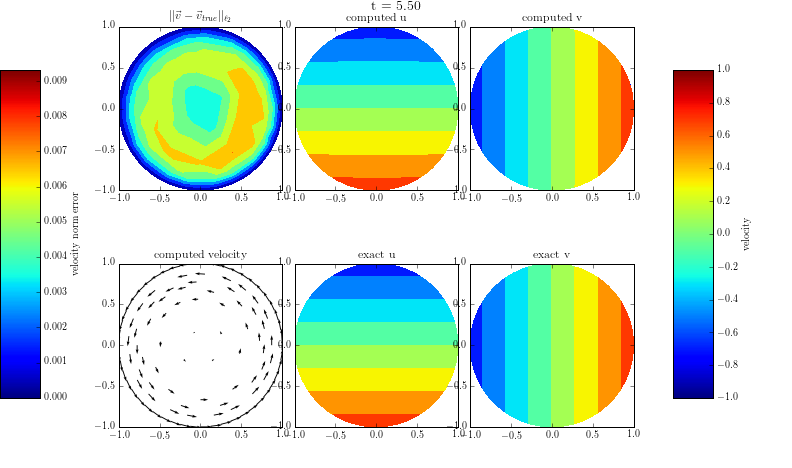
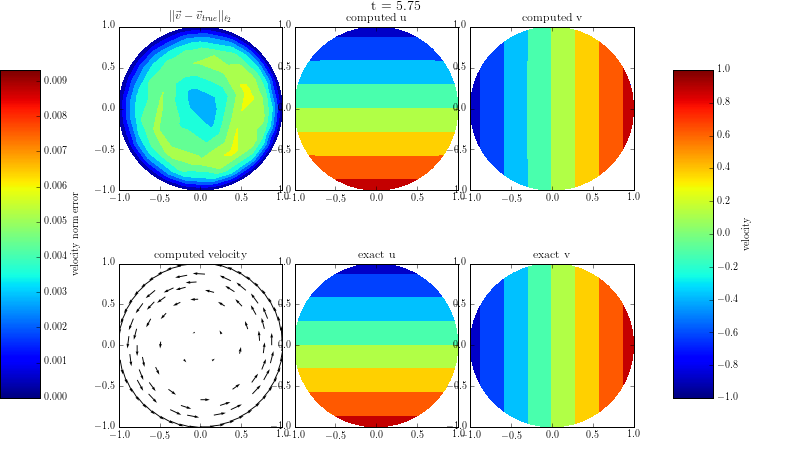
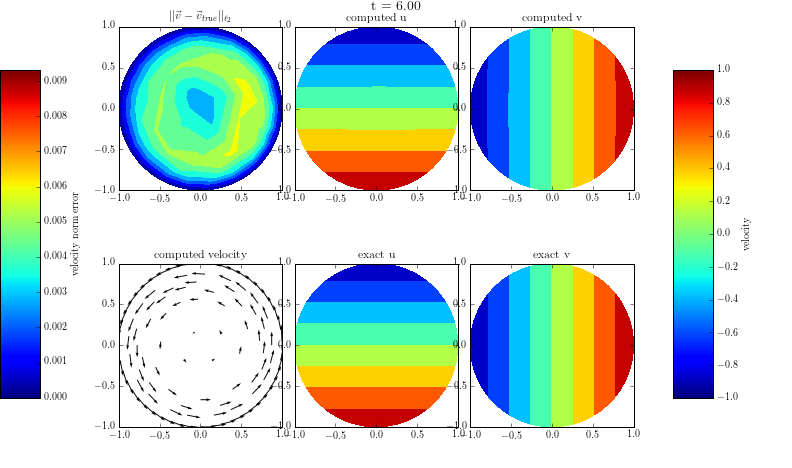
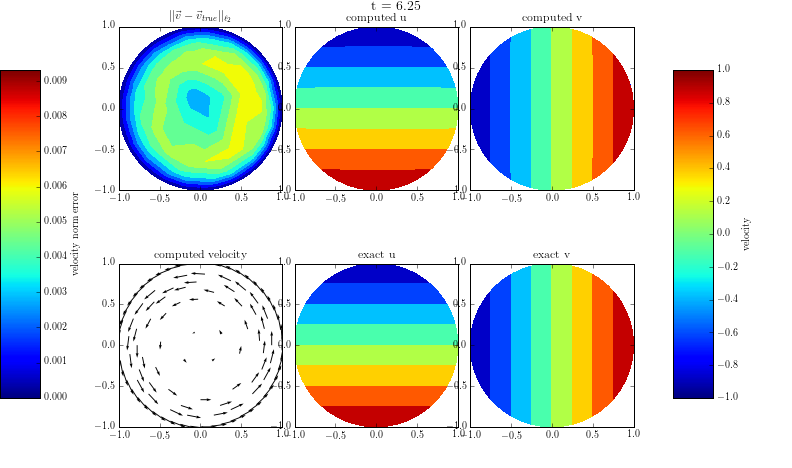
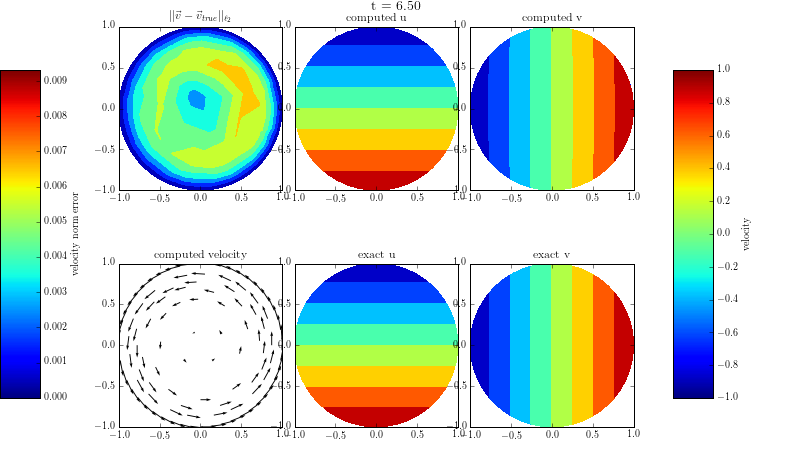
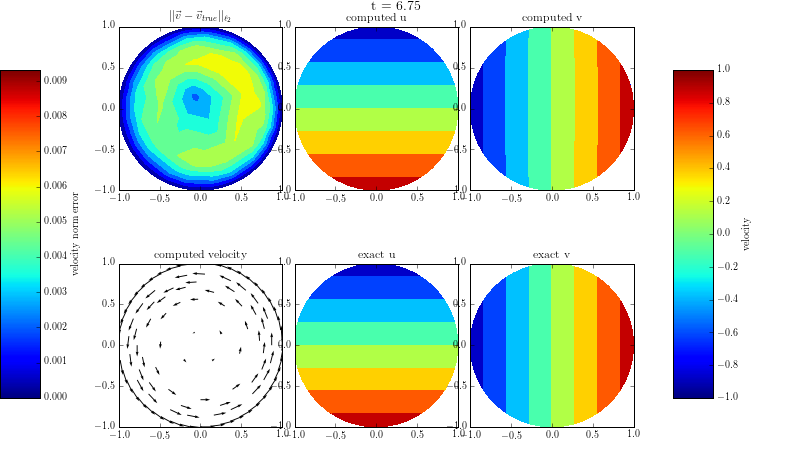
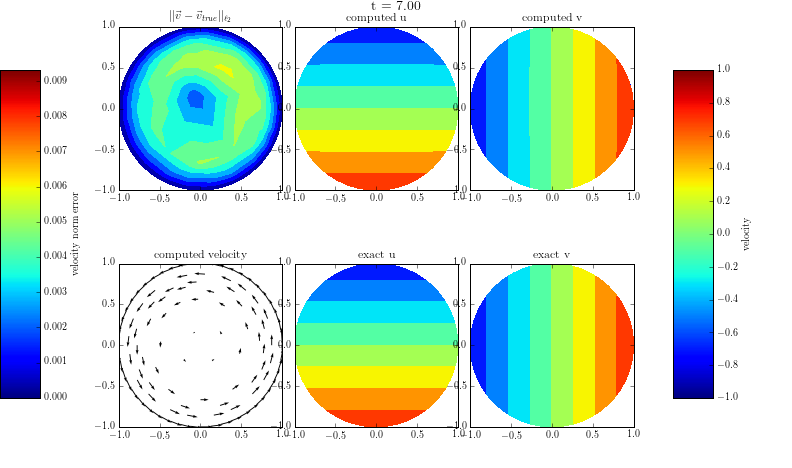
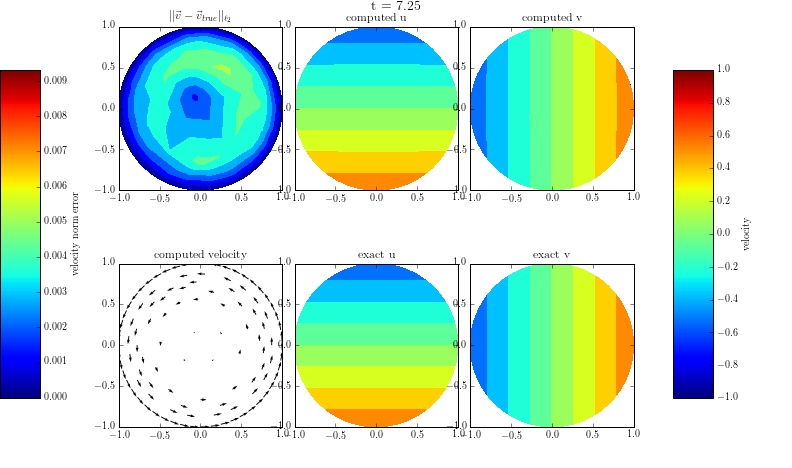
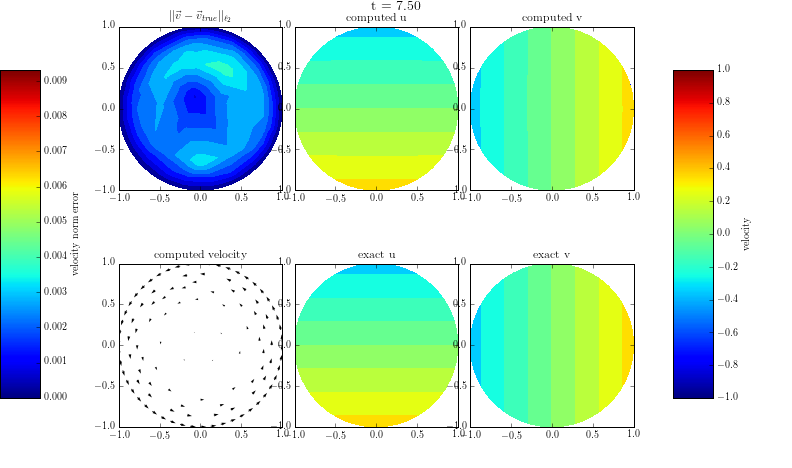
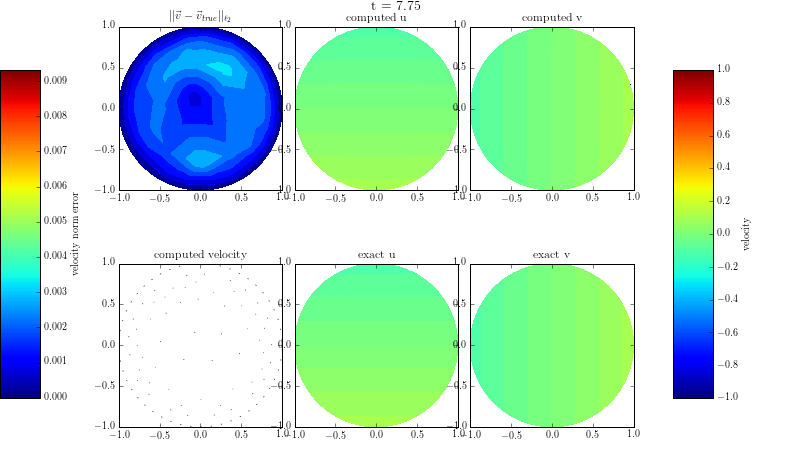
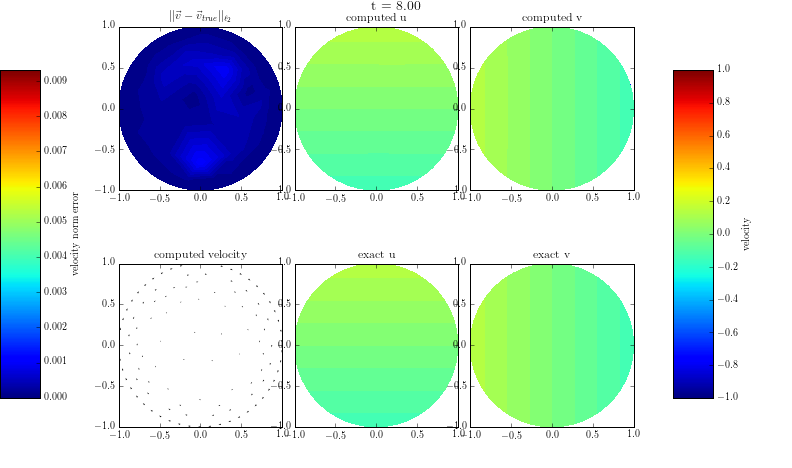
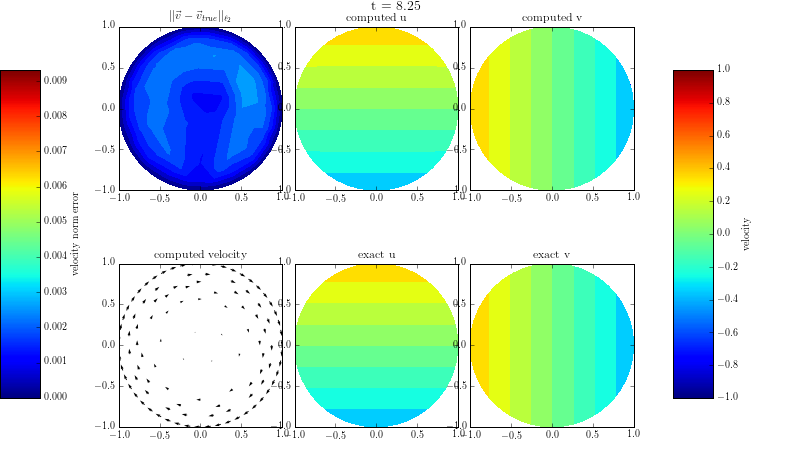
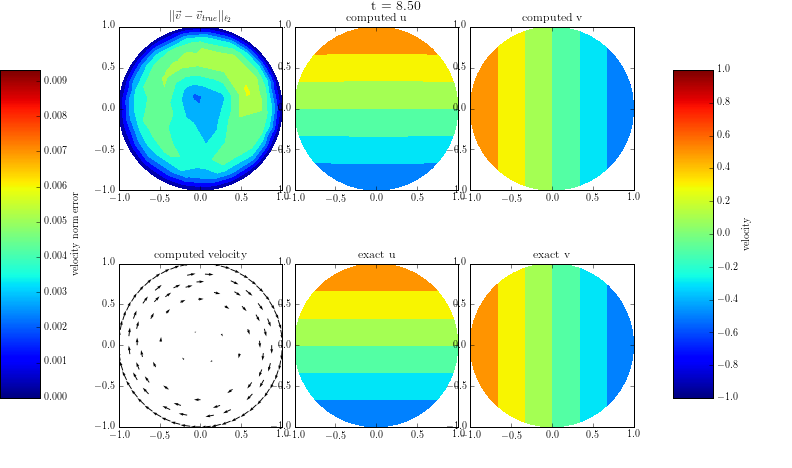
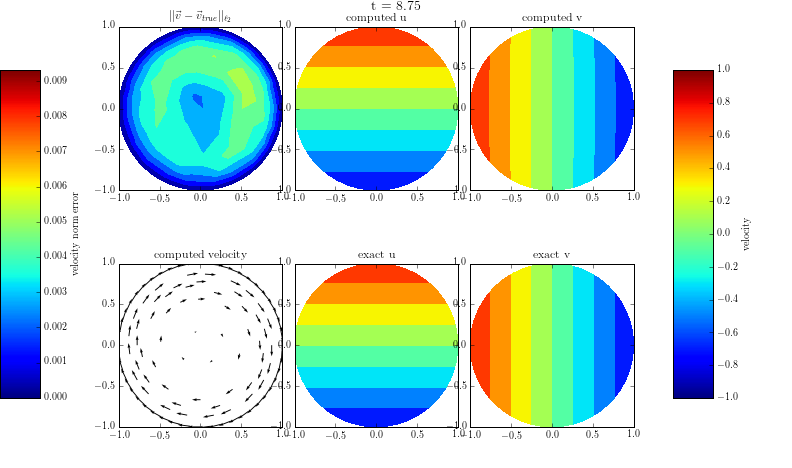
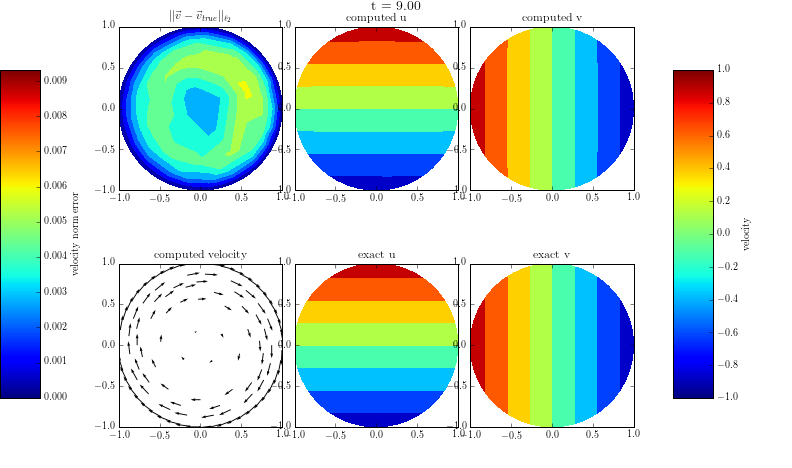
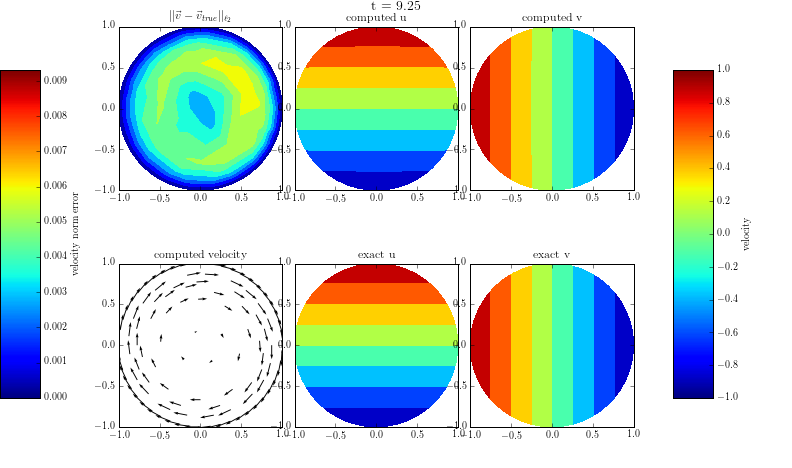
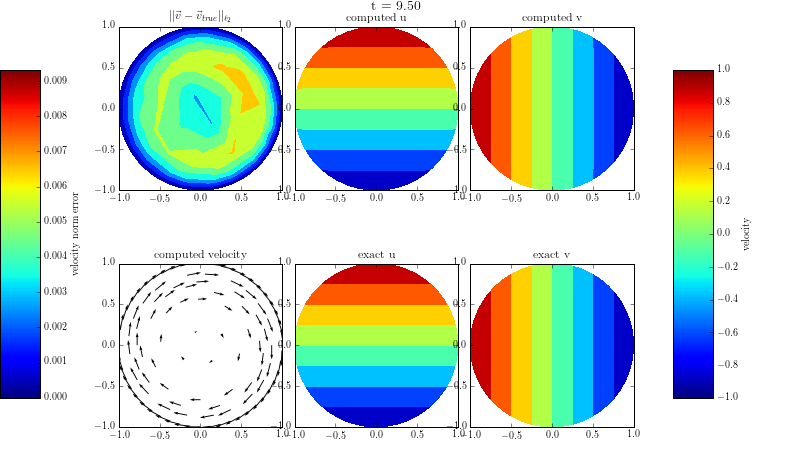
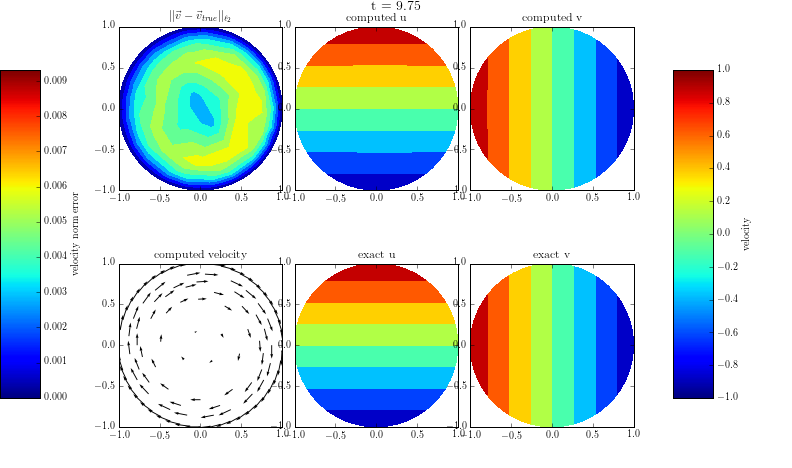
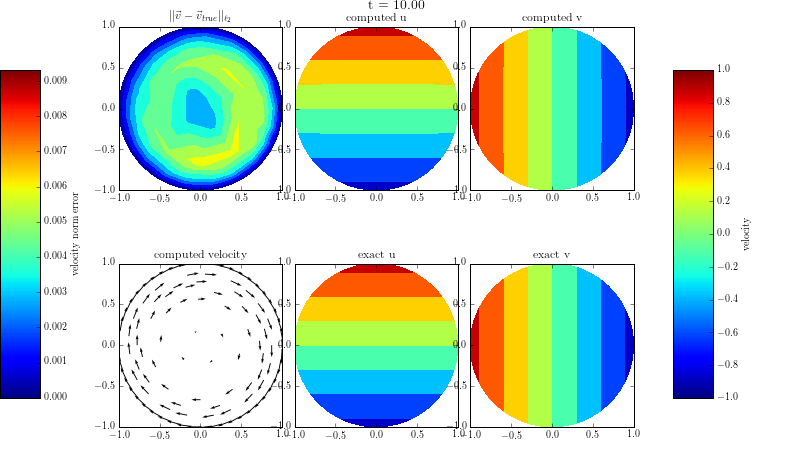

In [7]:
# setup initial figure spacing and create frames for input
fig = plt.figure(figsize=(11,6.5)) # w, h in inches

axvelerr = fig.add_subplot(231)
axu = fig.add_subplot(232)
axv = fig.add_subplot(233)
axvelquiv = fig.add_subplot(234)
axeu = fig.add_subplot(235)
axev = fig.add_subplot(236)

axvelerr.set_aspect('equal')
axvelquiv.set_aspect('equal')
axu.set_aspect('equal')
axv.set_aspect('equal')
axeu.set_aspect('equal')
axev.set_aspect('equal')

axvelerr.set_title('$\\|\\vec{v} - \\vec{v}_{true}\\|_{\ell_2}$')
axvelquiv.set_title('velocity')
axu.set_title('computed u')
axv.set_title('computed v')
axeu.set_title('exact u')
axev.set_title('exact v')

fig.tight_layout() # spread out the plots so that they don't overlap

# adjust plots to make room for colorbars
fig.subplots_adjust(right=0.8,top=0.98,left=0.15)
cbar_ax_right = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax_left = fig.add_axes([0.0, 0.15, 0.05, 0.7])


title = fig.suptitle("",x=0.5, y=1.00,
         horizontalalignment='center',
         fontsize=14,)

velocity_ell2_max = np.sqrt(2)*max(np.abs(velocity_diff_max),np.abs(velocity_diff_min))

# normalization parameters for plots to make colors consistent across plots
norm_velerr = plt.Normalize(vmin=0.0,vmax=velocity_ell2_max)
norm_vel = plt.Normalize(vmin=velocity_min,vmax=velocity_max)

# create scalar mappables that we will use for the colorbars to show entire range
# of colors instead of have them be autoscaled at each time step
#
# Thus the colorbars will be static instead of adapted to each shown plot
velerrfullrange = np.linspace(0.0,velocity_ell2_max,10)
vfullrange = np.linspace(velocity_min,velocity_max,10)

sm_velerr = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_velerr)
sm_velerr.set_array(velerrfullrange)

sm_vel = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_vel)
sm_vel.set_array(vfullrange)



def init():
    c_velerr = axvelerr.plot([],[])
    c_velquiv = axvelquiv.plot([],[])
    c_u = axu.plot([],[])
    c_v = axv.plot([],[])
    c_eu = axeu.plot([],[])
    c_ev = axev.plot([],[])
    return (c_u,c_v,c_eu,c_ev,c_velquiv,c_velerr)


def animate(i):
    # time
    t = so.ctx.tnList[i]
    title.set_text("t = %.2f" %t)
    
    h5=openFile("guermond_example_variable_density_p0.h5","r")        
    triangles = h5.getNode("/elementsSpatial_Domain%i" %i)
    xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
    n = xvals.shape[0]
    
    u = h5.getNode("/u%i" %i)[:n]
    v = h5.getNode("/v%i" %i)[:n]
    u_true = so.ctx.utrue(xvals,t)
    v_true = so.ctx.vtrue(xvals,t)
    
    vel_error = np.sqrt(pow(u-u_true,2.) + pow(v-v_true,2.))

    
    c_velerr = axvelerr.tricontourf(xvals[:,0],xvals[:,1], triangles, vel_error, norm=norm_velerr)
    axvelquiv.cla() # clear quiver axes explicitly since it doesn't seem to do it on its own
    c_velquiv = axvelquiv.quiver(xvals[:,0],xvals[:,1],u,v,angles='xy',scale=10)
    axvelquiv.set_title('computed velocity')    
    c_u = axu.tricontourf(xvals[:,0],xvals[:,1], triangles, u, norm=norm_vel)
    c_eu = axeu.tricontourf(xvals[:,0],xvals[:,1], triangles, u_true, norm=norm_vel)    
    c_v = axv.tricontourf(xvals[:,0],xvals[:,1], triangles, v, norm=norm_vel)
    c_ev = axev.tricontourf(xvals[:,0],xvals[:,1], triangles, v_true, norm=norm_vel)
    
    cbar_velerror = fig.colorbar(sm_velerr,cax=cbar_ax_left, norm=norm_velerr)  # static colorbar
    cbar_velerror.set_label("velocity norm error")
    
    cbar_vel = fig.colorbar(sm_vel, cax=cbar_ax_right, norm=norm_vel)
    cbar_vel.set_label("velocity")
    
    h5.close()
    plt.show() # force the legends and formatting to show up

    return (c_u,c_v,c_eu,c_ev,c_velquiv,c_velerr)

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=np.size(so.ctx.tnList), interval=30, blit=True) # 30 milliseconds between frames  


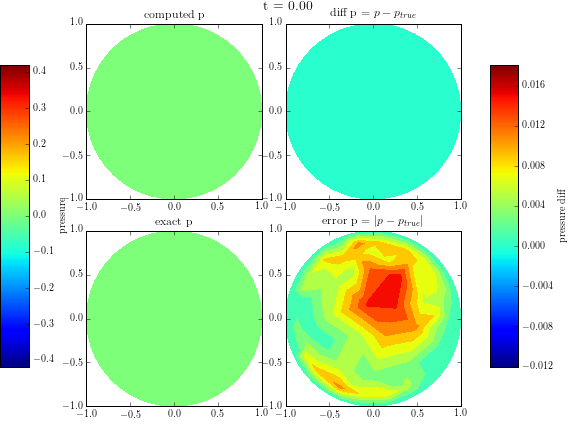
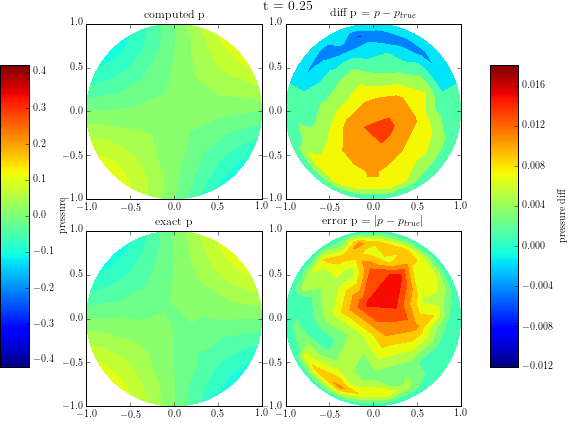
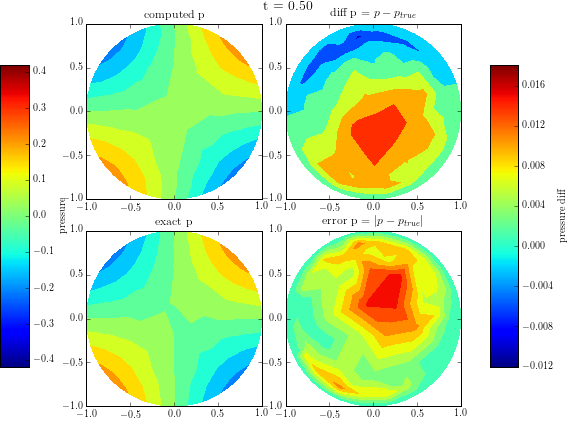
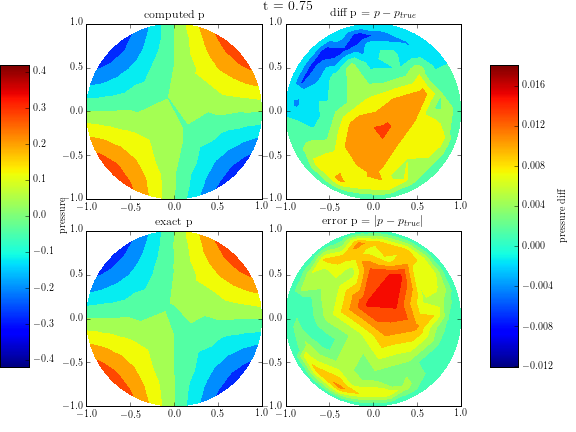
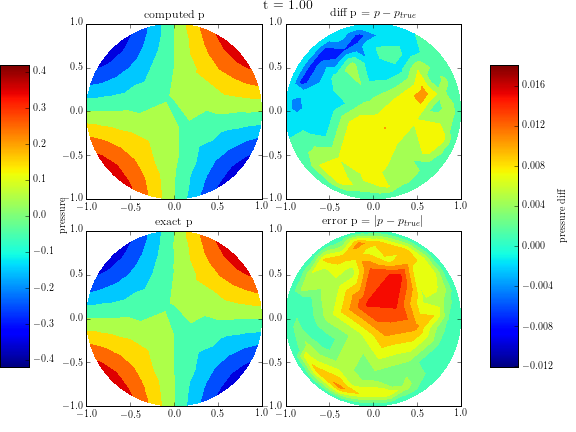
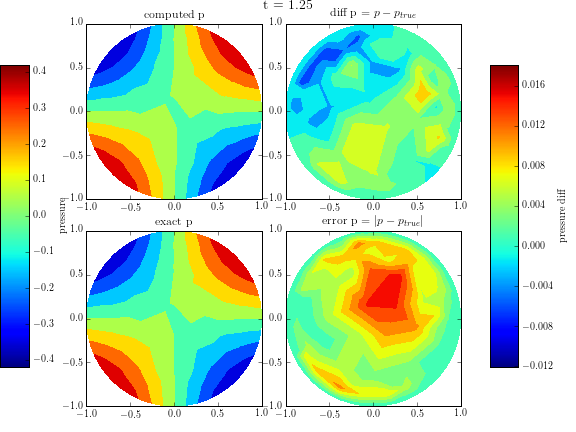
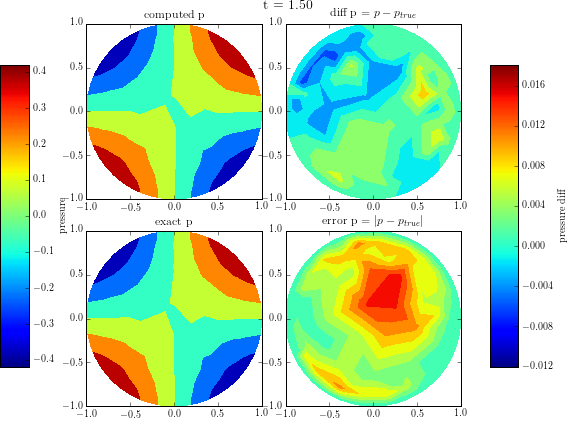
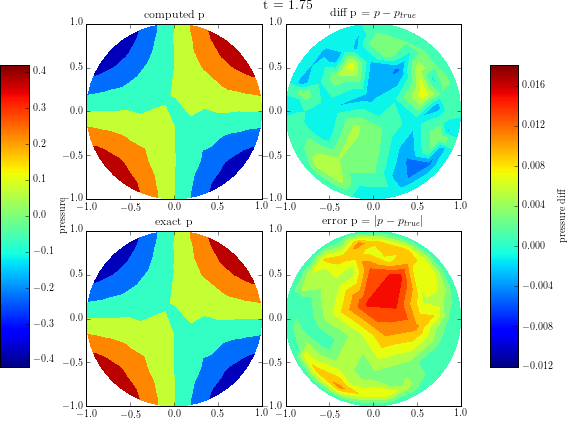
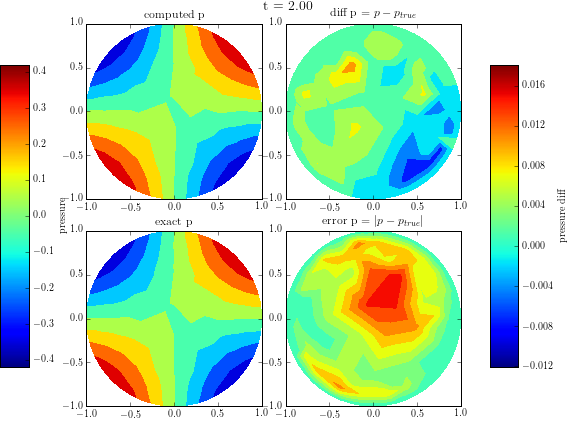
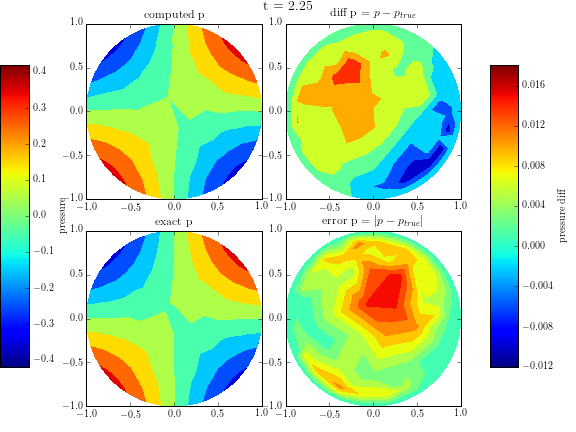
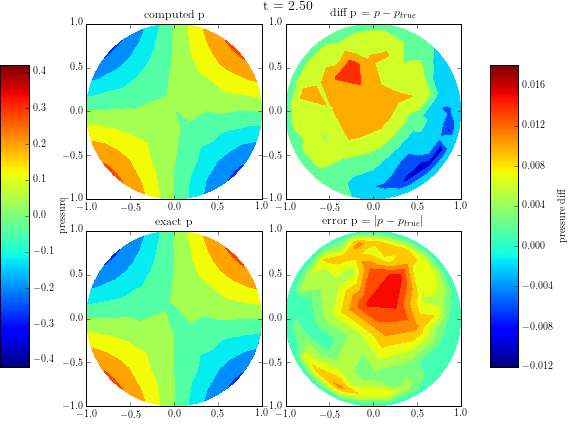
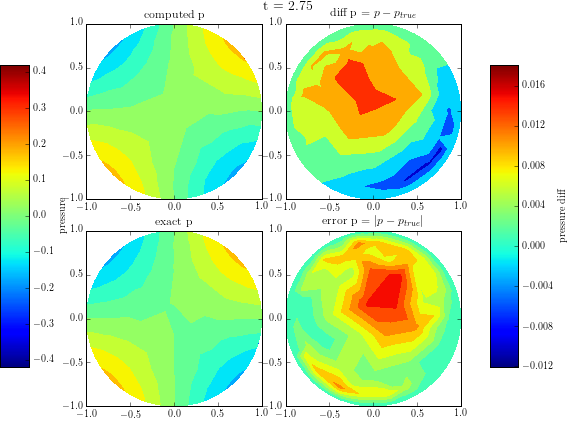
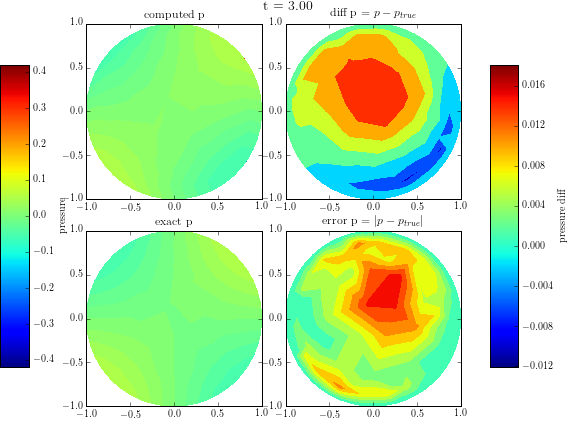
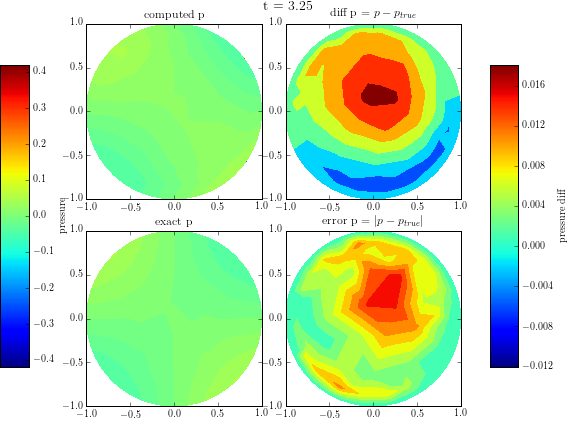
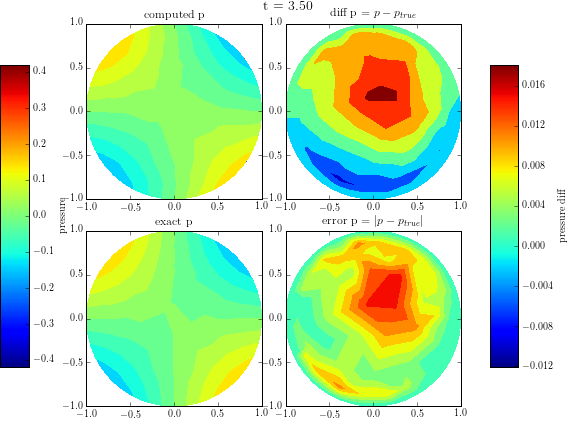
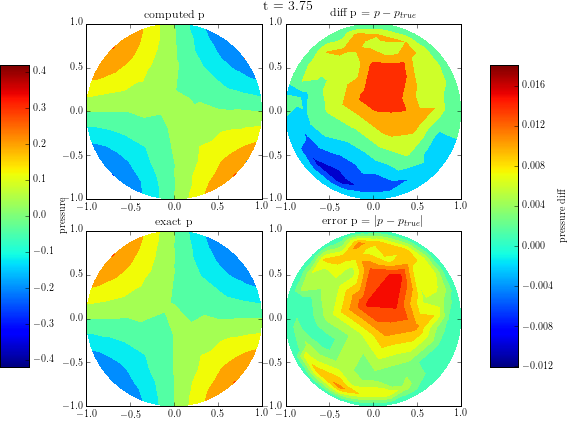
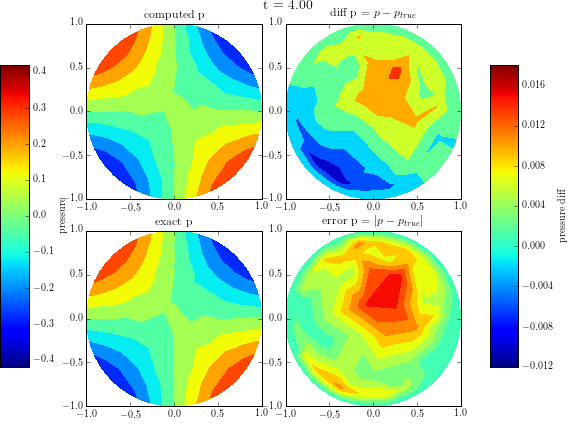
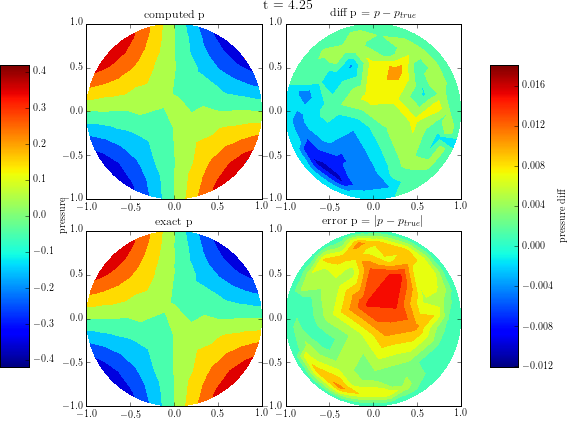
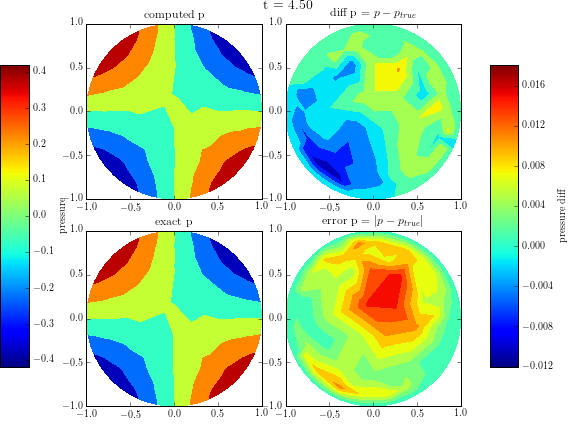
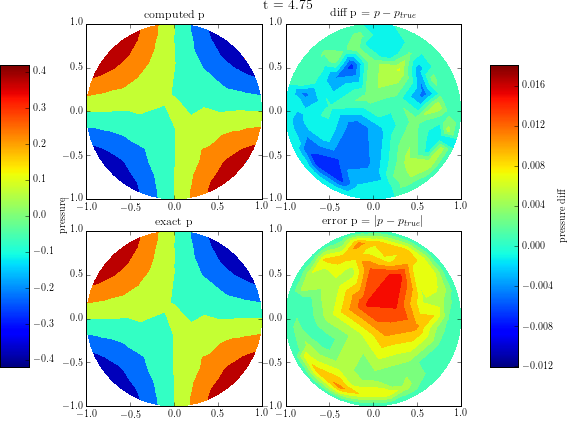
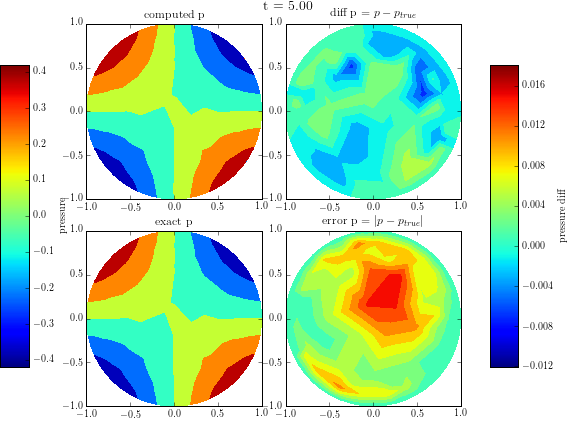
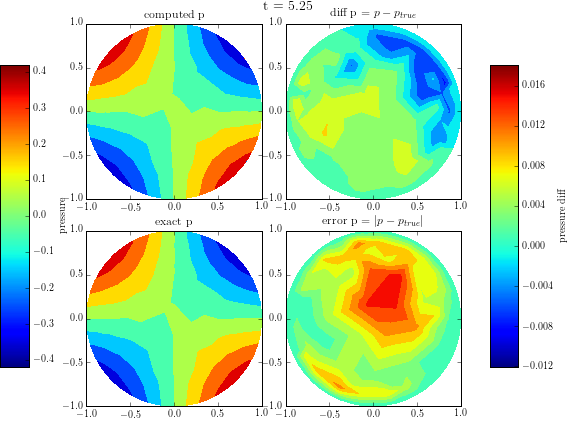
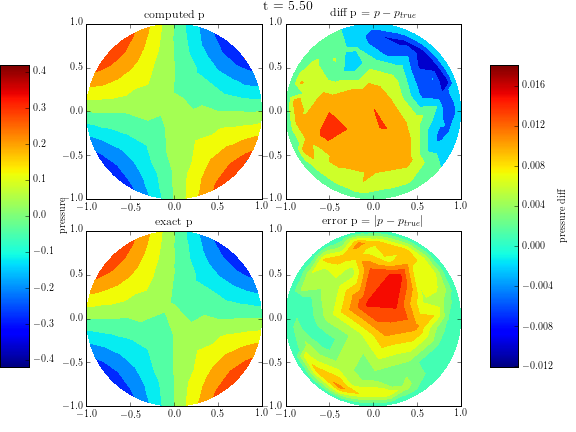
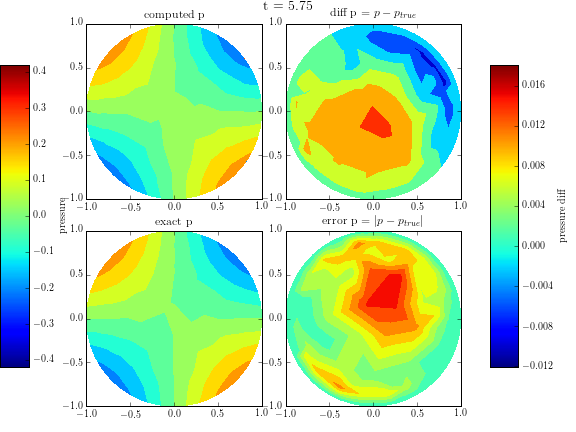
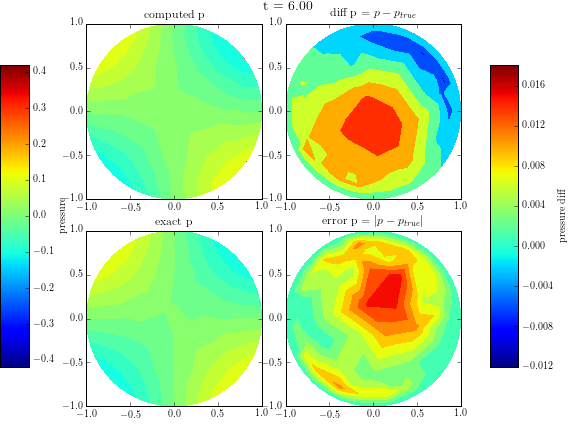
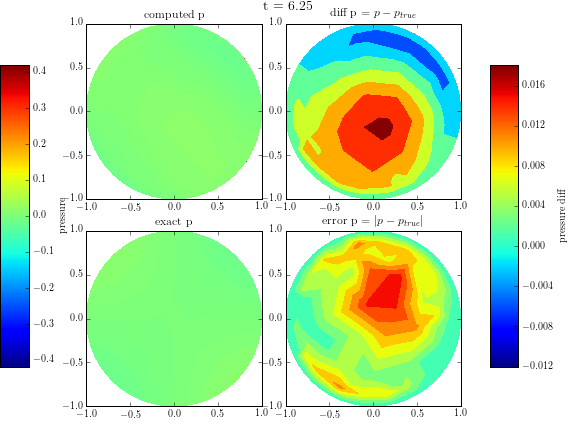
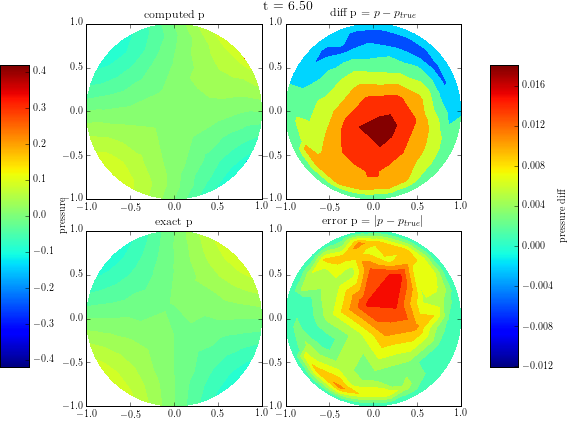
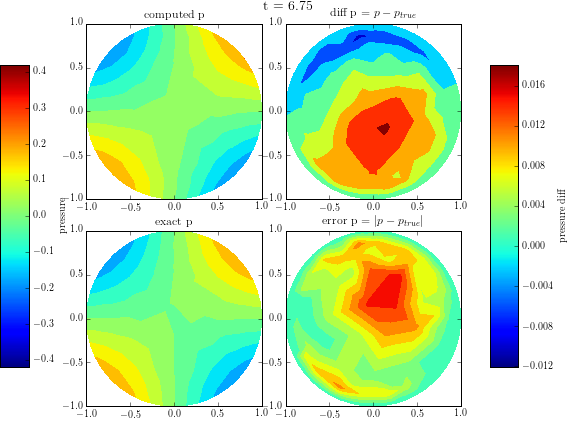
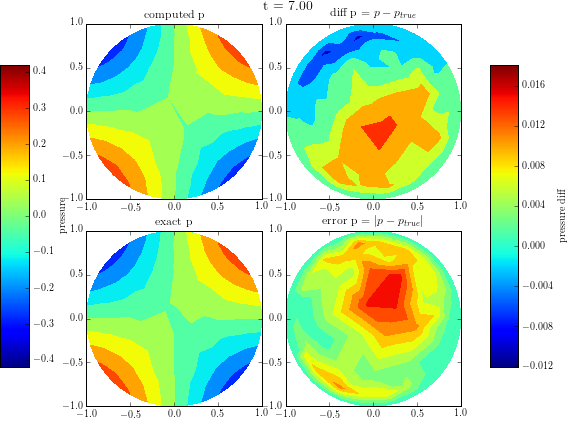
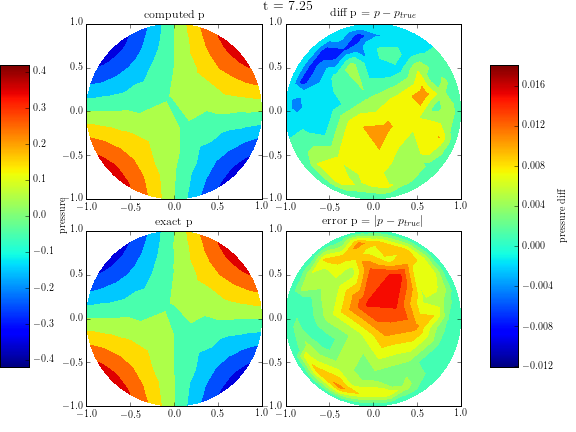
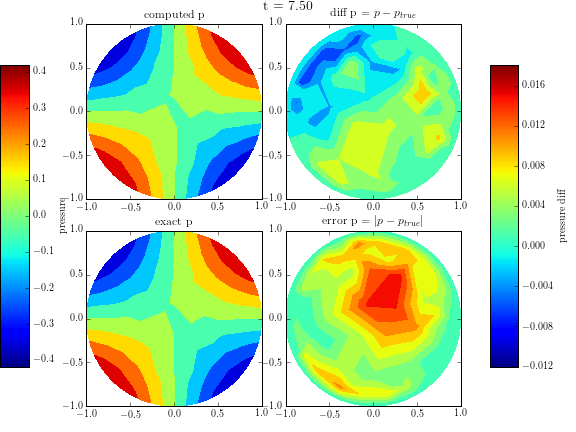
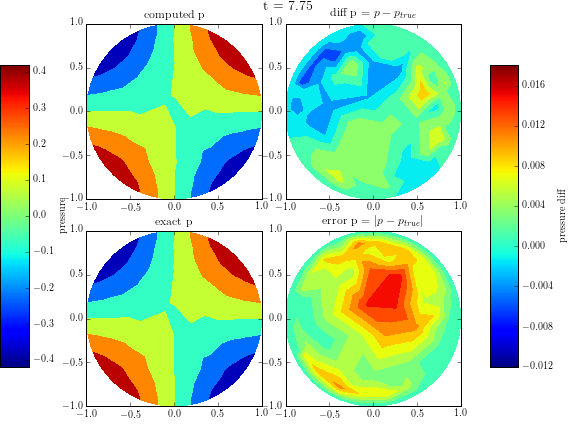
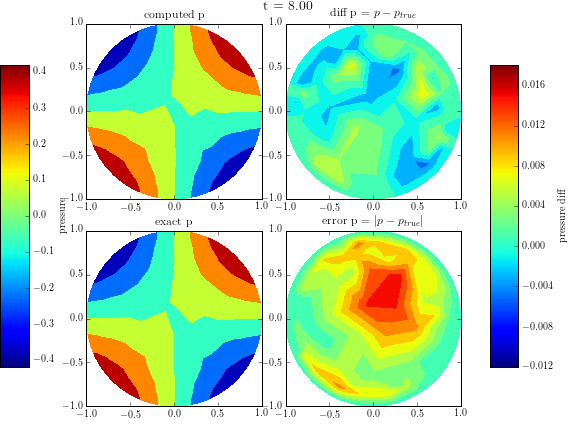
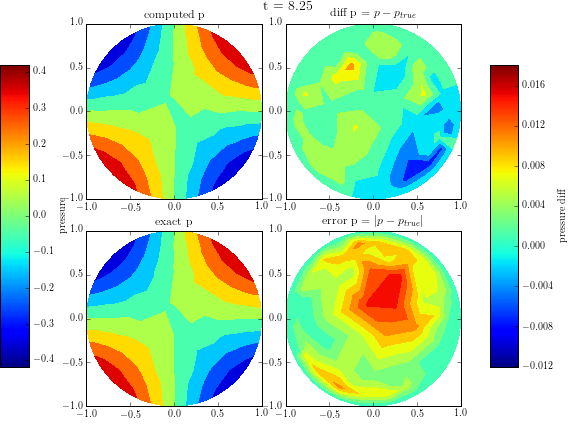
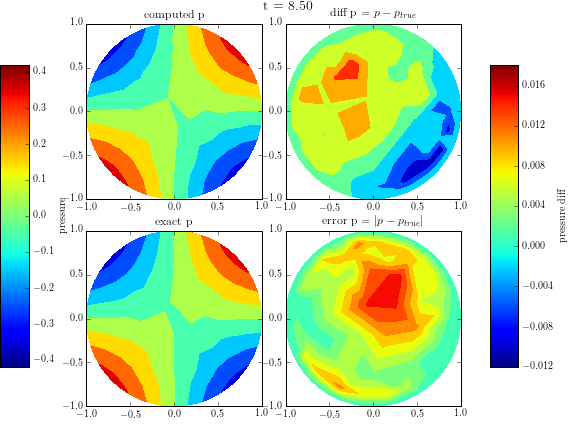
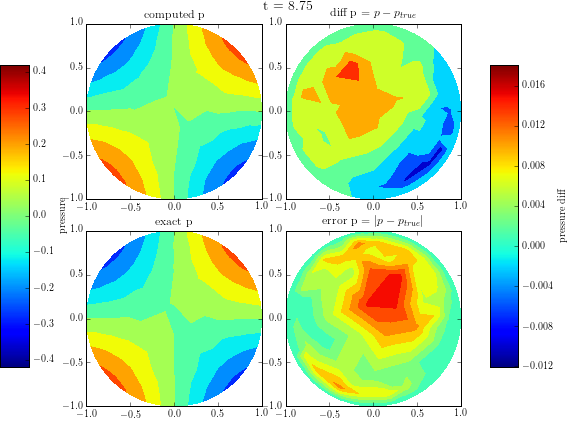
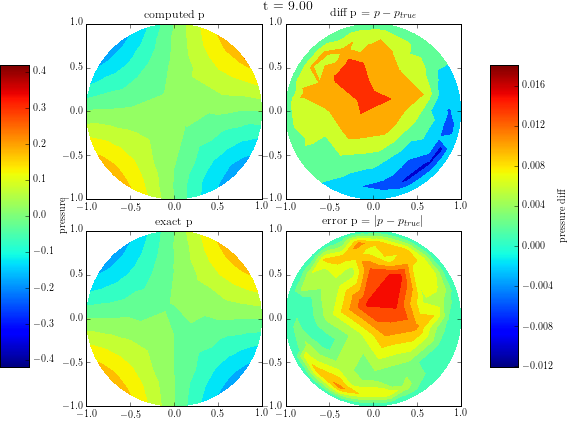
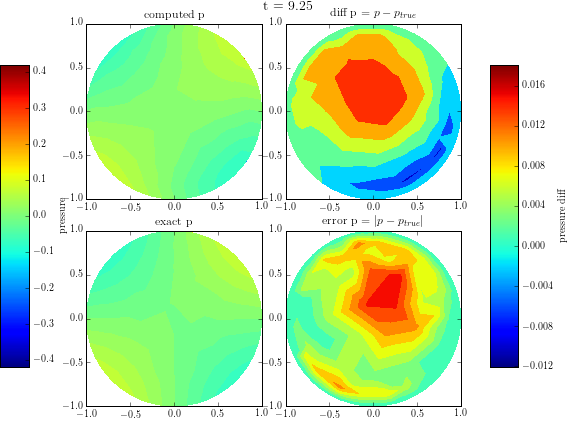
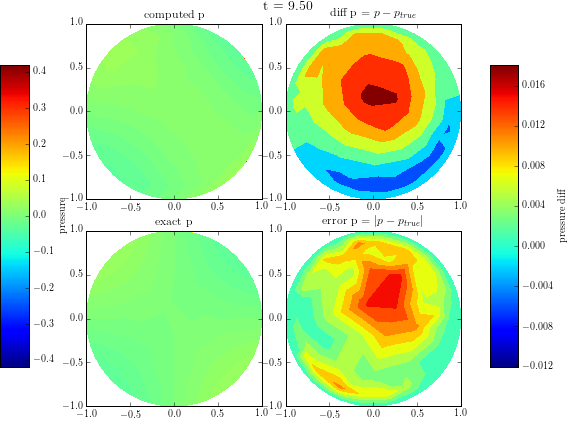
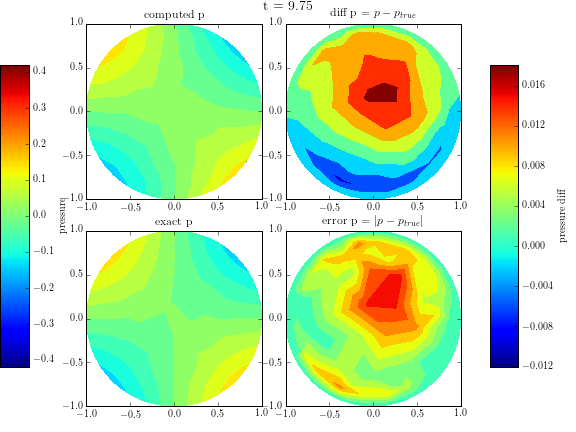
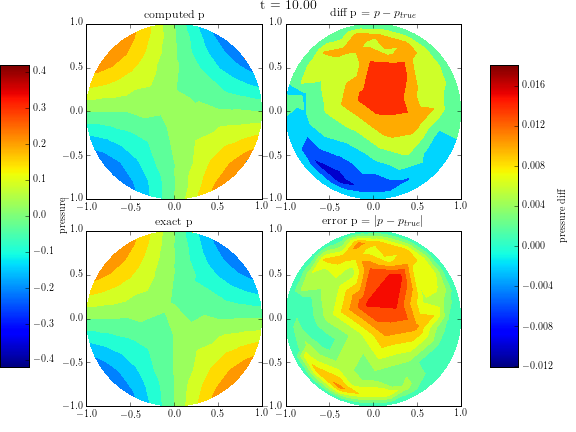

In [8]:

fig = plt.figure(figsize=(8,6)) # w, h in inches
axp = fig.add_subplot(221)
axep = fig.add_subplot(223)
axpdiff = fig.add_subplot(222)
axperr = fig.add_subplot(224)

fig.tight_layout() # spread out the plots so that they don't overlap
fig.subplots_adjust(left=0.15, right=0.8,top=0.95)

cbar_ax_right = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax_left = fig.add_axes([0.0, 0.15, 0.05, 0.7])

title = fig.suptitle("",x=0.5, y=1.0,
         horizontalalignment='center',
         fontsize=14,)

axp.set_aspect('equal')
axep.set_aspect('equal')
axpdiff.set_aspect('equal')
axperr.set_aspect('equal')

axp.set_title('computed p')
axep.set_title('exact p')
axpdiff.set_title('diff p = $p-p_{true}$ ')
axperr.set_title('error p = $|p-p_{true}|$')

# normalization parameters for plots to make colors consistent across plots
norm_p = plt.Normalize(vmin=pressure_min,vmax=pressure_max)
norm_pdiff = plt.Normalize(vmin=pressure_diff_min,vmax=pressure_diff_max)

# create scalar mappables that we will use for the colorbars to show entire range
# of colors instead of have them be autoscaled at each time step
#
# Thus the colorbars will be static instead of adapted to each shown plot
pfullrange = np.linspace(pressure_min,pressure_max,10)
pdifffullrange = np.linspace(pressure_diff_min,pressure_diff_max,10)

sm_p = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_p)
sm_p.set_array(pfullrange)

sm_pdiff = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_pdiff)
sm_pdiff.set_array(pdifffullrange)

# create animation plots
def init():
    c_p = axp.plot([],[])
    c_ep = axep.plot([],[])
    c_pdiff = axpdiff.plot([],[])
    c_perr = axperr.plot([],[])
    return (c_p, c_ep, c_pdiff, c_perr)

def animate(i):
    # time
    t = so.tnList[i]
    title.set_text("t = %.2f" %t)
    
    h5=openFile("guermond_example_variable_density_p0.h5","r") 
    
    # density
    xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
    n = xvals.shape[0]
    triangles = h5.getNode("/elementsSpatial_Domain%i" %i)[:]
    
    p = h5.getNode("/p%i" %i)[:]
    p_true = so.ctx.ptrue(xvals,t)

    pdiff = p-p_true
    perr = np.abs(p_diff)
    
    c_p = axp.tricontourf(xvals[:,0],xvals[:,1], triangles, p, norm=norm_p)
    c_ep = axep.tricontourf(xvals[:,0],xvals[:,1], triangles, p_true, norm=norm_p)
    c_pdiff = axpdiff.tricontourf(xvals[:,0],xvals[:,1],triangles,pdiff, norm=norm_pdiff)
    c_perr = axperr.tricontourf(xvals[:,0],xvals[:,1],triangles,perr, norm=norm_pdiff)
        
    cbar_p = fig.colorbar(sm_p,cax=cbar_ax_left, norm=norm_p)
    cbar_p.set_label("pressure")
    
    cbar_rho = fig.colorbar(sm_pdiff, cax=cbar_ax_right, norm=norm_pdiff)
    cbar_rho.set_label("pressure diff")
    
    h5.close()
    plt.show() # force the legends and formatting to show up

    return (c_p, c_ep, c_pdiff, c_perr)


animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(so.ctx.tnList), interval=30, blit=True) # 30 milliseconds between frames  

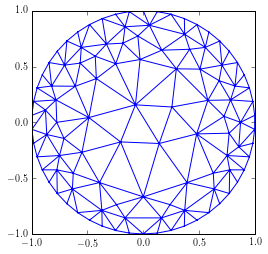

In [9]:
fig_mesh = plt.figure(figsize=(4,4)) # w, h in inches
h5=openFile("guermond_example_variable_density_p0.h5","r") 
nodes = h5.getNode("/nodesSpatial_Domain%i" %0)[:]
triangles = h5.getNode("/elementsSpatial_Domain%i" %0)[:]
plt.triplot(nodes[:,0],nodes[:,1],triangles)
plt.axis('equal')
# close the table file after extracting all the solutions for the movie above
h5.close()

Plot the density and velocity field with density errors


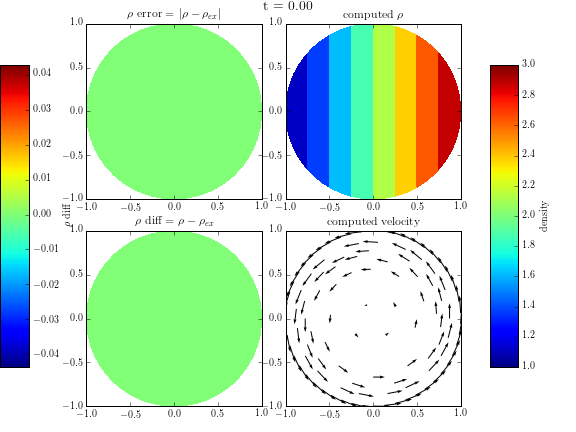
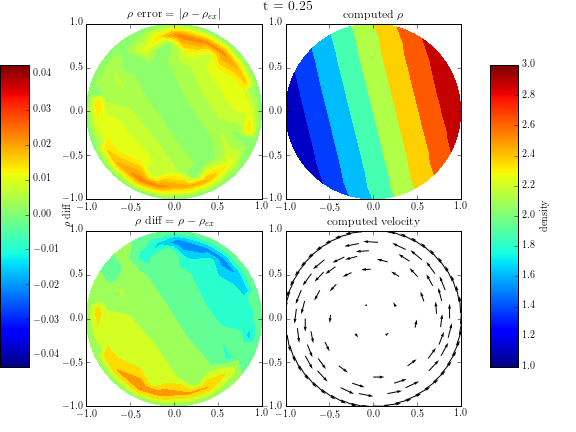
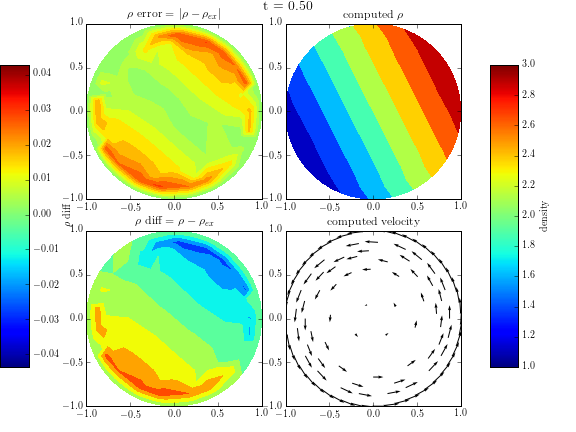
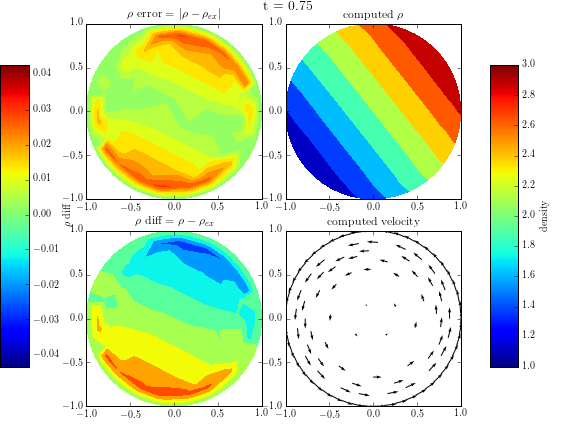
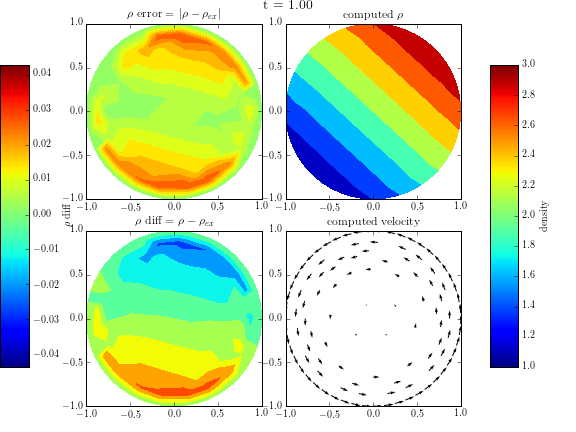
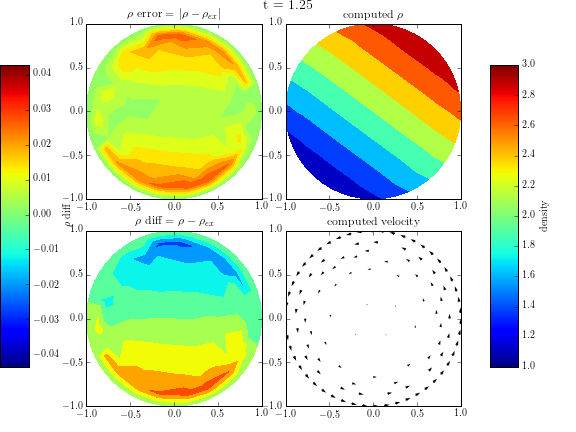
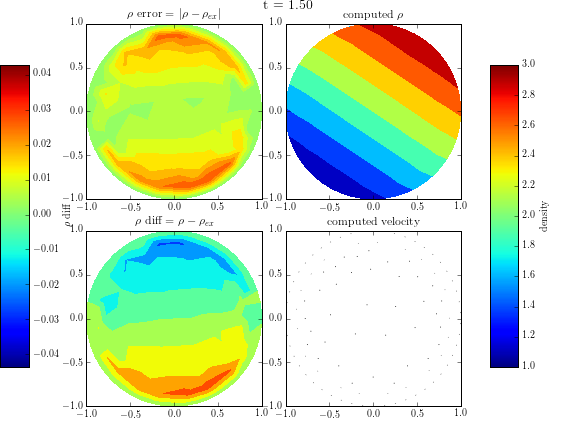
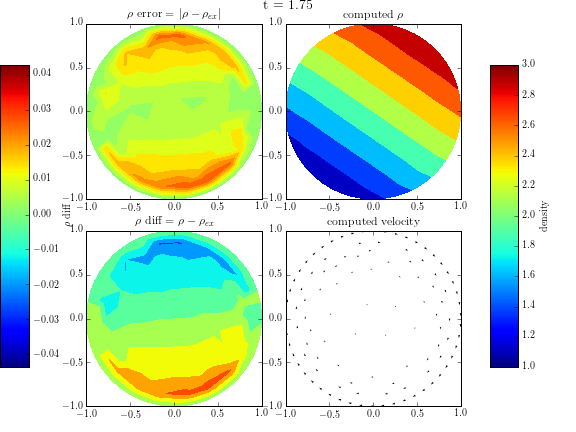
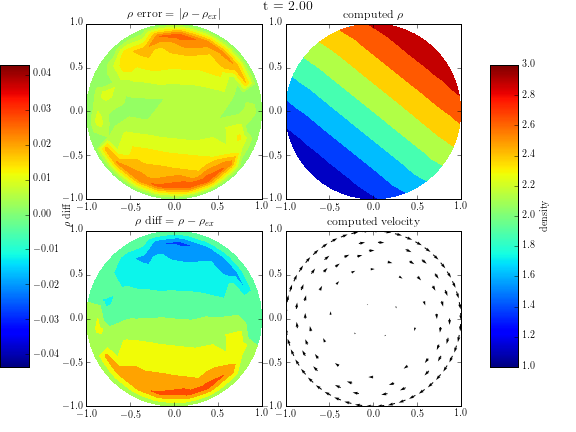
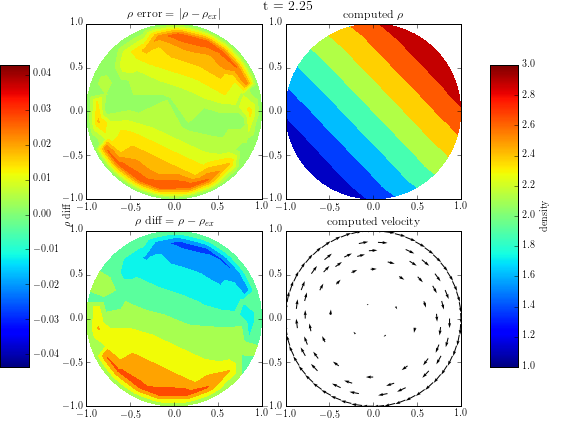
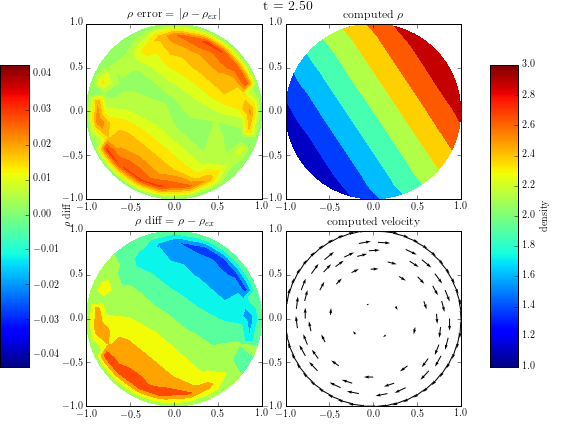
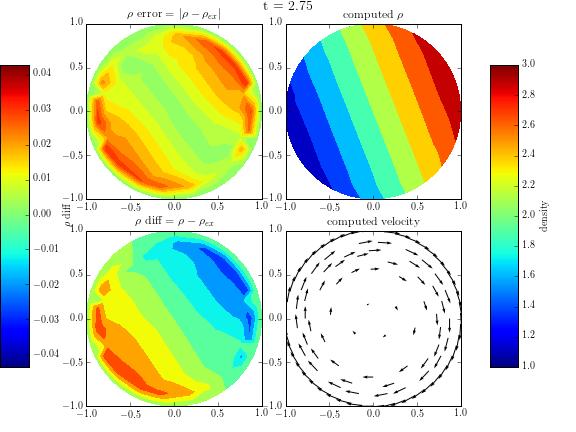
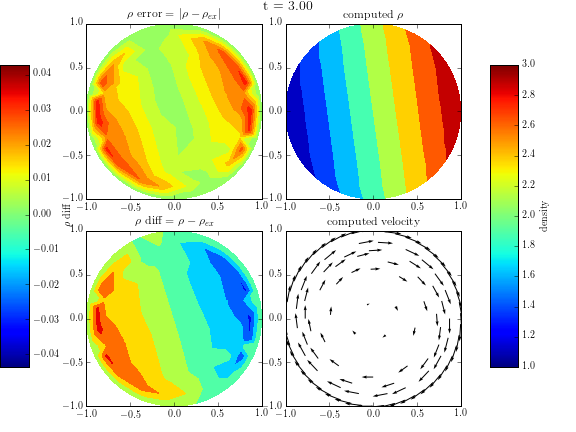
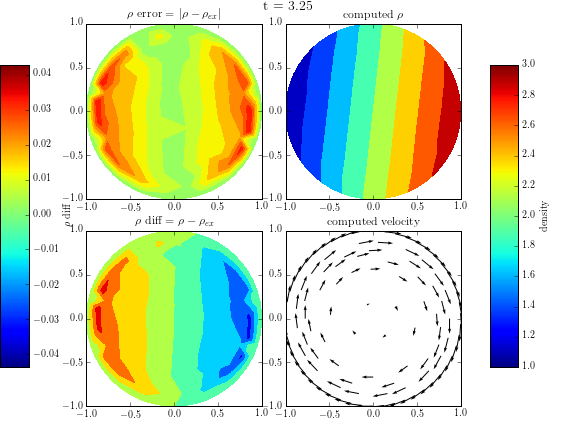
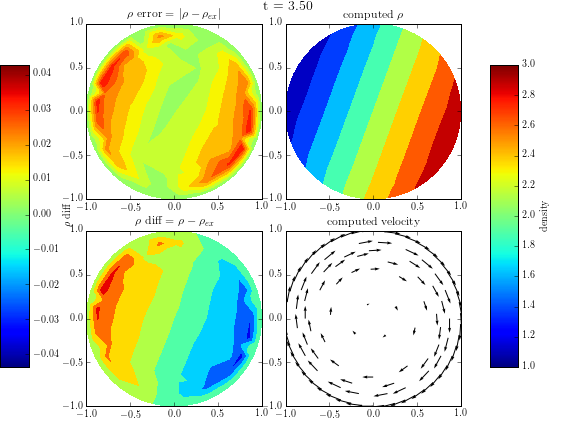
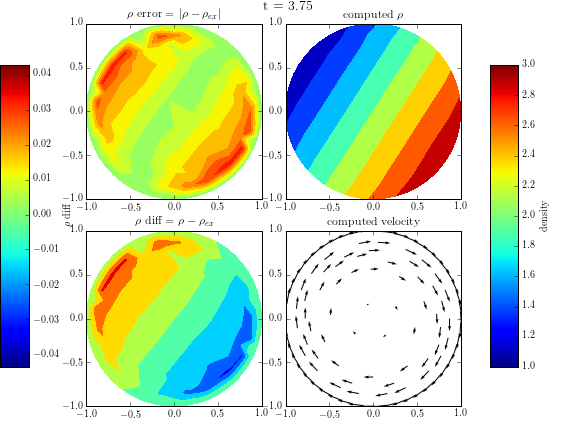
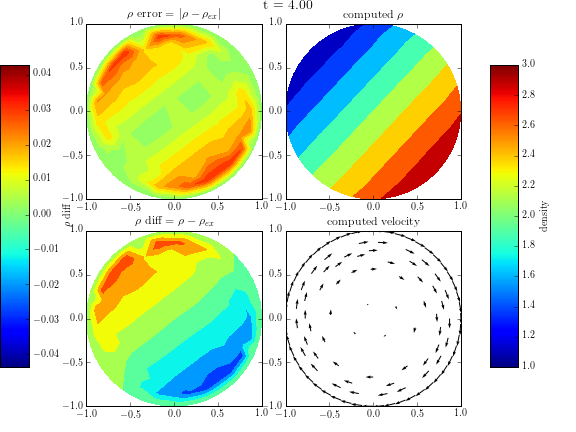
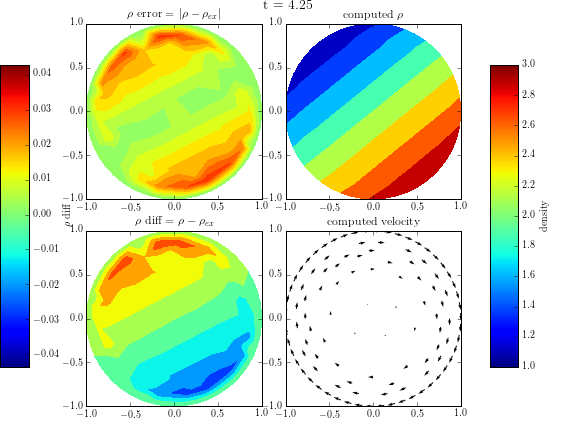
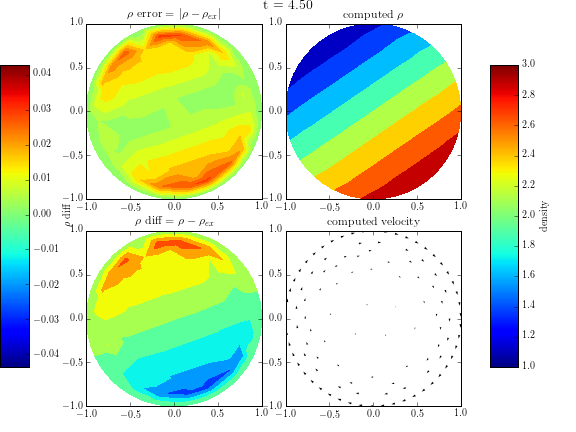
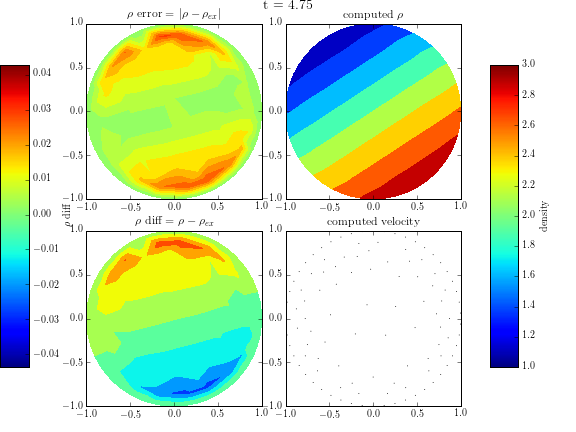
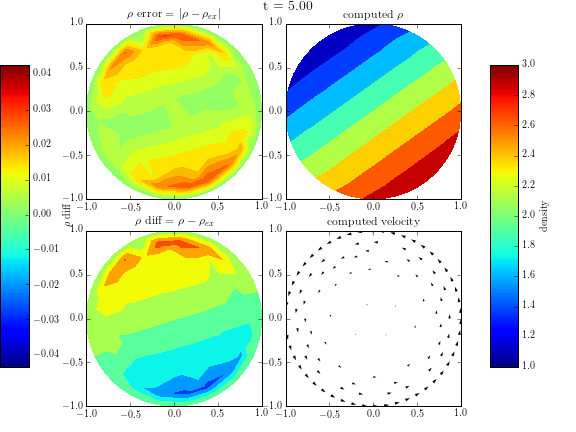
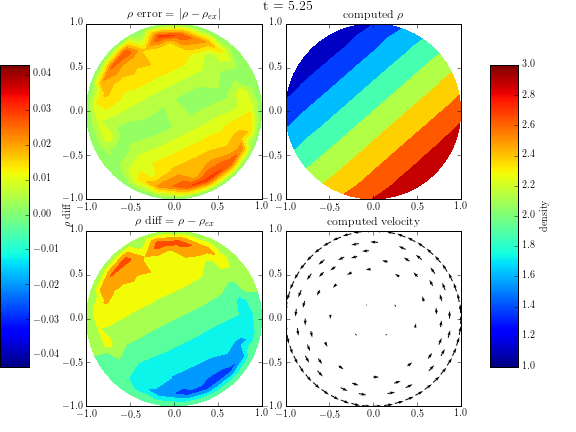
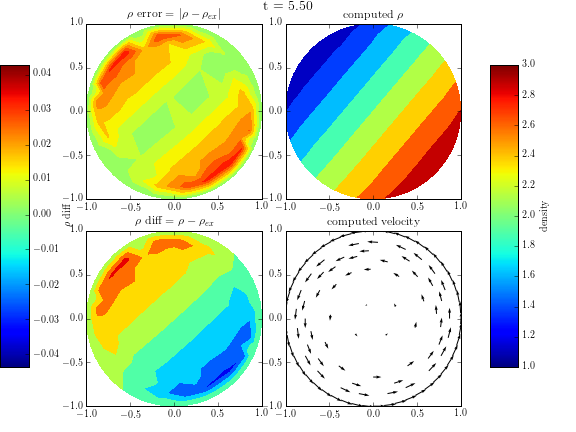
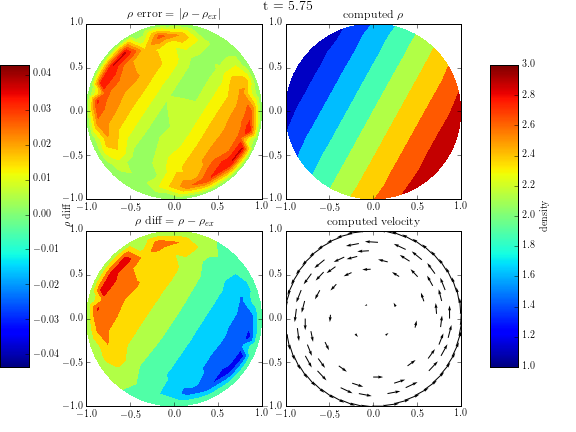
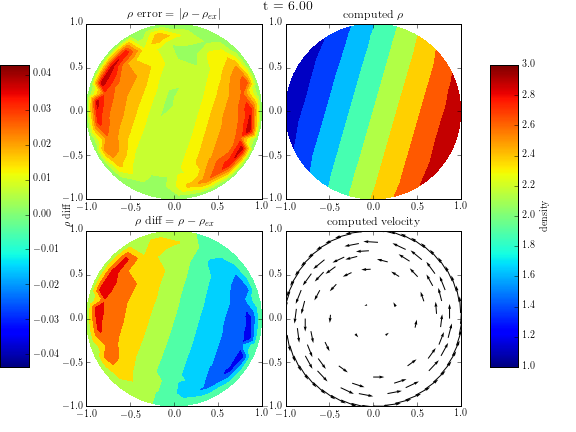
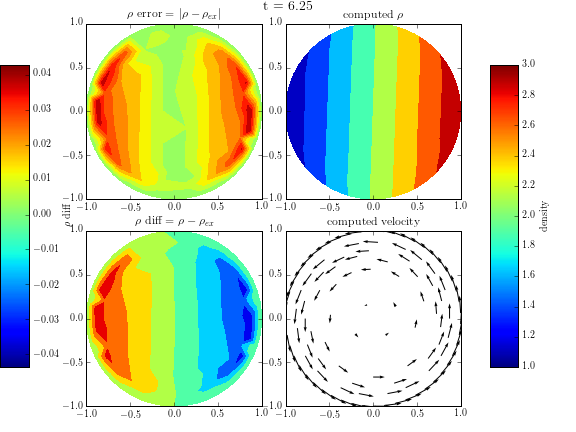
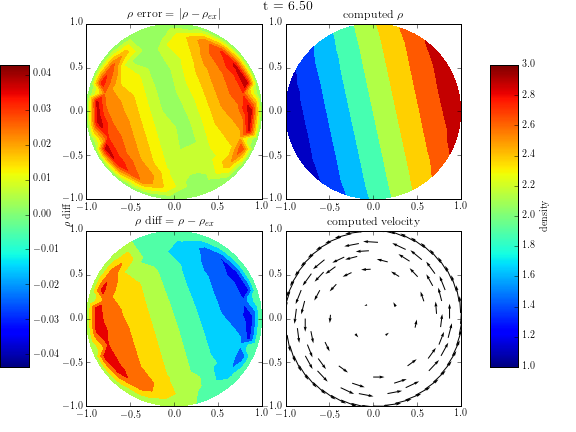
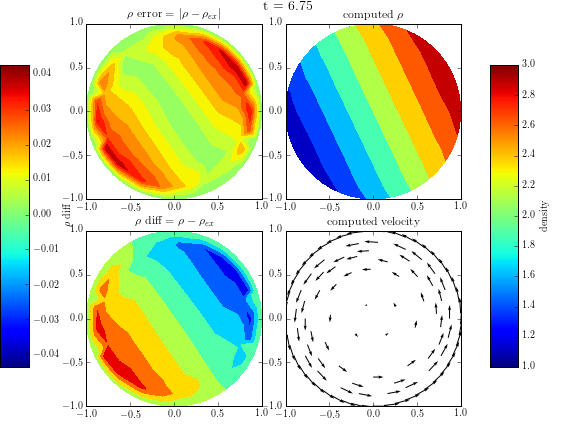
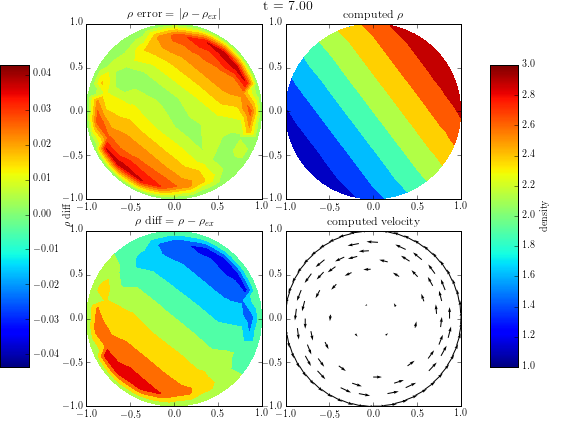
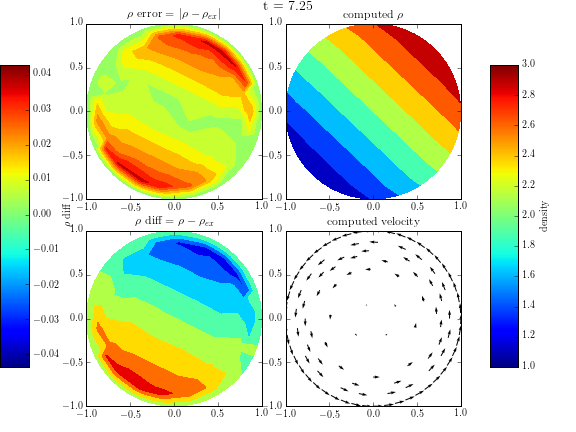
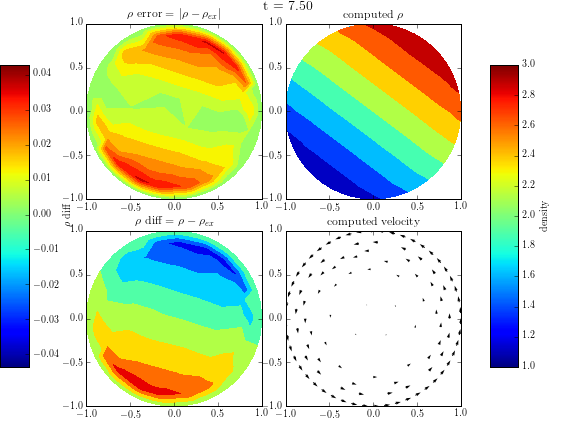
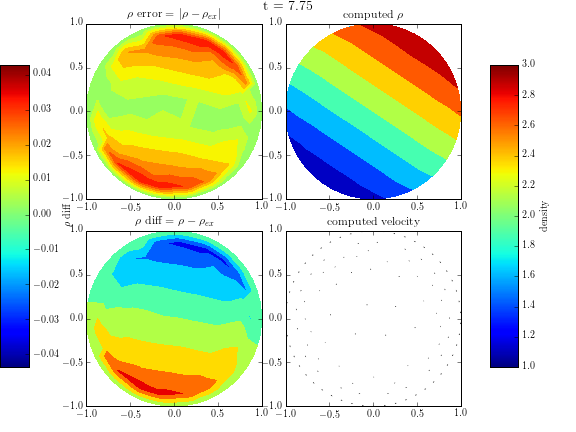
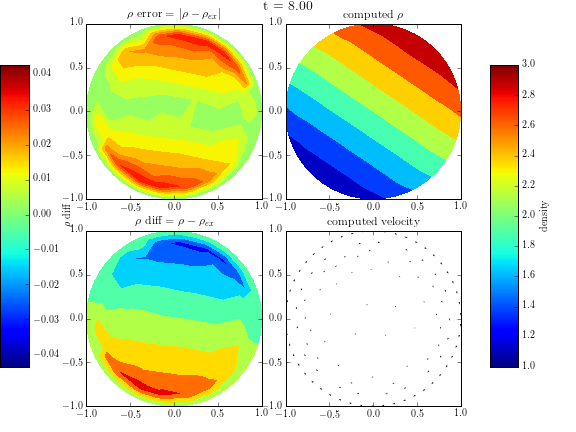
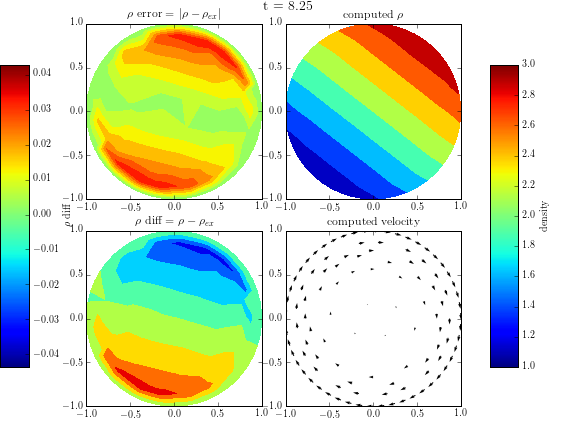
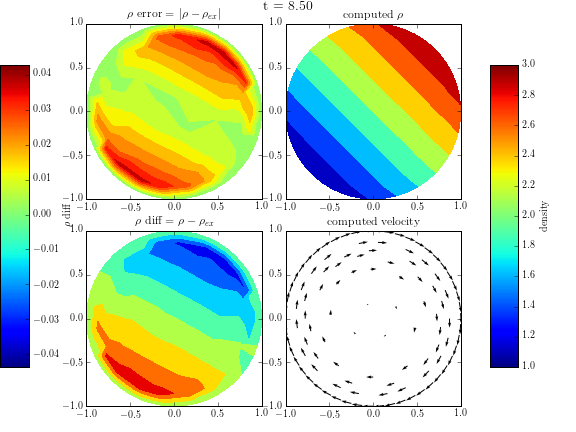
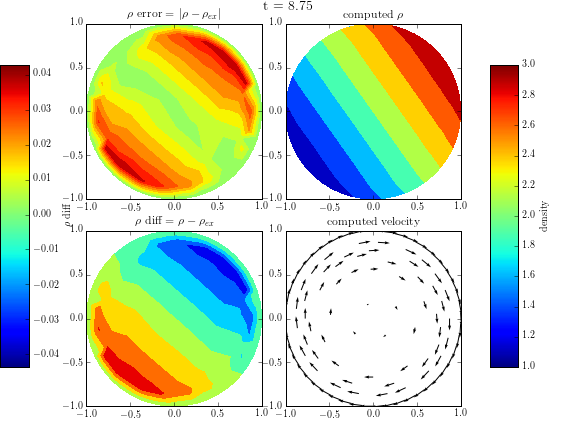
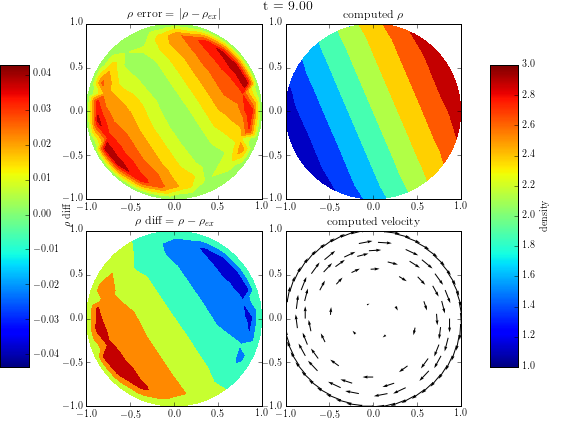
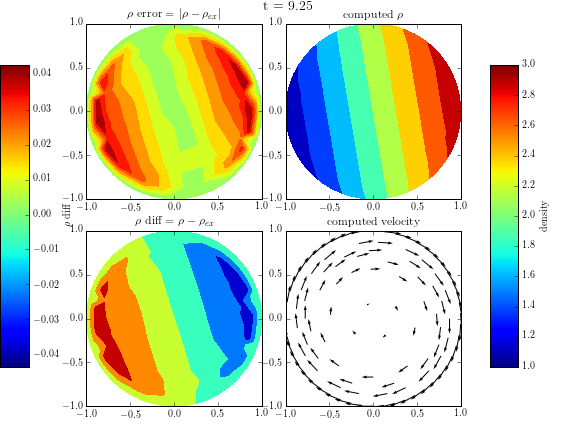
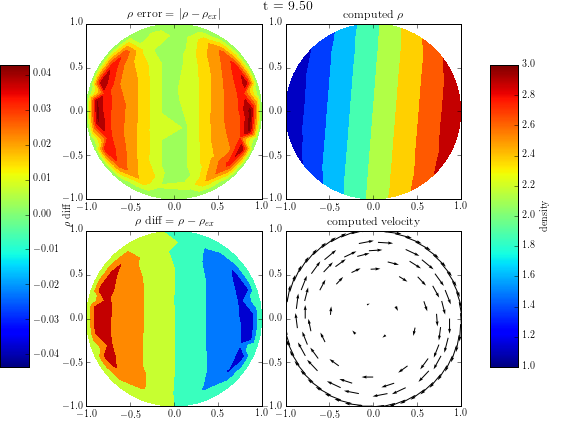
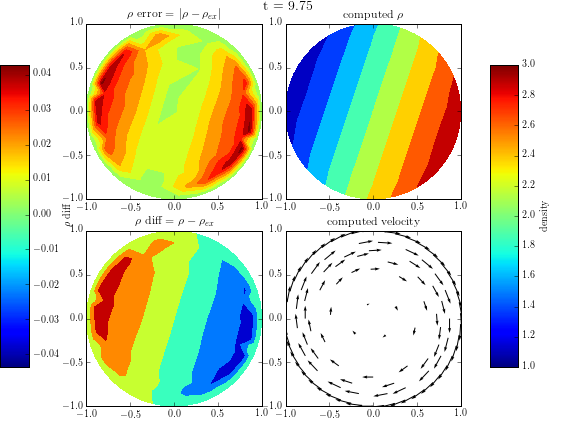
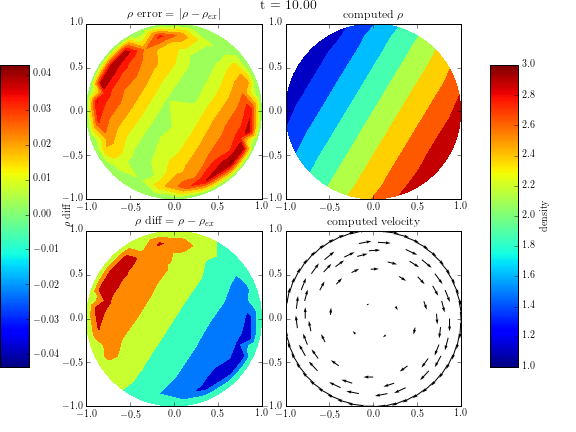

In [11]:
fig = plt.figure(figsize=(8,6)) # w, h in inches
axrho = fig.add_subplot(222)
axrhoerr = fig.add_subplot(221)
axvel = fig.add_subplot(224)
axrhodiff = fig.add_subplot(223)


fig.tight_layout() # spread out the plots so that they don't overlap
fig.subplots_adjust(right=0.8,top=0.95,left=0.15)

cbar_ax_right = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax_left = fig.add_axes([0.0, 0.15, 0.05, 0.7])

title = fig.suptitle("",x=0.5, y=1.0,
         horizontalalignment='center',
         fontsize=14,)

axrho.set_aspect('equal')
axrhoerr.set_aspect('equal')
axvel.set_aspect('equal')
axrhodiff.set_aspect('equal')

axrho.set_title('computed $\\rho$')
# axerho.set_title('exact $\\rho$')
axrhoerr.set_title('$\\rho$ error = $|\\rho - \\rho_{ex}|$')
axrhodiff.set_title('$\\rho$ diff = $\\rho - \\rho_{ex}$')
axvel.set_title('computed velocity')

# normalization parameters for plots to make colors consistent across plots
norm_rho = plt.Normalize(vmin=density_min,vmax=density_max)
norm_rhodiff = plt.Normalize(vmin=density_diff_min,vmax=density_diff_max)

# create scalar mappables that we will use for the colorbars to show entire range
# of colors instead of have them be autoscaled at each time step
#
# Thus the colorbars will be static instead of adapted to each shown plot
rhofullrange = np.linspace(density_min,density_max,10)
rhodifffullrange = np.linspace(density_diff_min,density_diff_max,10)

sm_rhodiff = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_rhodiff)
sm_rhodiff.set_array(rhodifffullrange)

sm_rho = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_rho)
sm_rho.set_array(rhofullrange)


# create animation plots

def init():
    t = so.tnList[0]
    title.set_text("t = %.2f" %t)
    
    h5=openFile("guermond_example_variable_density_p0.h5","r") 
    xvals = h5.getNode("/nodesSpatial_Domain%i" %0)[:]
    n = xvals.shape[0]
    triangles = h5.getNode("/elementsSpatial_Domain%i" %0)[:]
    u = h5.getNode("/u%i" %0)[:n]
    v = h5.getNode("/v%i" %0)[:n]
    rho_comp = h5.getNode("/rho%i" %0)[:n]
    rho_true = so.ctx.rhotrue(xvals,t)
    h5.close()
    
    c_rhodiff = axrhodiff.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_true, norm=norm_rhodiff)
    c_rho = axrho.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_comp, norm=norm_rho)
    c_rhoerr = axrhoerr.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_true, norm=norm_rhodiff)
    c_vel = axvel.quiver(xvals[:,0],xvals[:,1],u,v,angles='xy',scale=10)
    axvel.set_title('computed velocity')
    return (c_rho, c_rhodiff,c_vel,c_rhoerr)

def animate(i):
    # time
    t = so.tnList[i]
    title.set_text("t = %.2f" %t)
    
    h5=openFile("guermond_example_variable_density_p0.h5","r") 
    
    # density
    xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
    n = xvals.shape[0]
    triangles = h5.getNode("/elementsSpatial_Domain%i" %i)[:]
    
    u = h5.getNode("/u%i" %i)[:n]
    v = h5.getNode("/v%i" %i)[:n]
    
    rho = h5.getNode("/rho%i" %i)[:n]
    rho_true = so.ctx.rhotrue(xvals,t)
    
    rho_diff = rho-rho_true
    rho_err = np.abs(rho-rho_true)
        
    c_rho = axrho.tricontourf(xvals[:,0],xvals[:,1],triangles,rho, norm=norm_rho)
    c_rhodiff = axrhodiff.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_diff, norm=norm_rhodiff)
    c_rhoerr = axrhoerr.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_err, norm=norm_rhodiff)
    axvel.cla() # clear quiver axes explicitly since it doesn't seem to do it on its own
    c_vel = axvel.quiver(xvals[:,0],xvals[:,1],u,v,angles='xy',scale=10)
    axvel.set_title('computed velocity')

    cbar_right = fig.colorbar(sm_rho, cax=cbar_ax_right, norm=norm_rho)
    cbar_right.set_label("density")
    
    cbar_left = fig.colorbar(sm_rhodiff,cax=cbar_ax_left, norm=norm_rhodiff)
    cbar_left.set_label("$\\rho$ diff")
    
    h5.close()
    plt.show() # force the legends and formatting to show up

    return (c_rho, c_rhoerr, c_vel,c_rhodiff)


animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(so.ctx.tnList), interval=30, blit=True) # 30 milliseconds between frames  

Plot all computed solutions


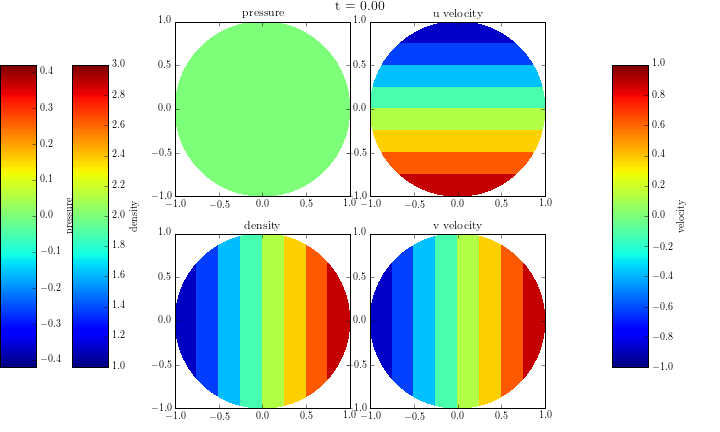
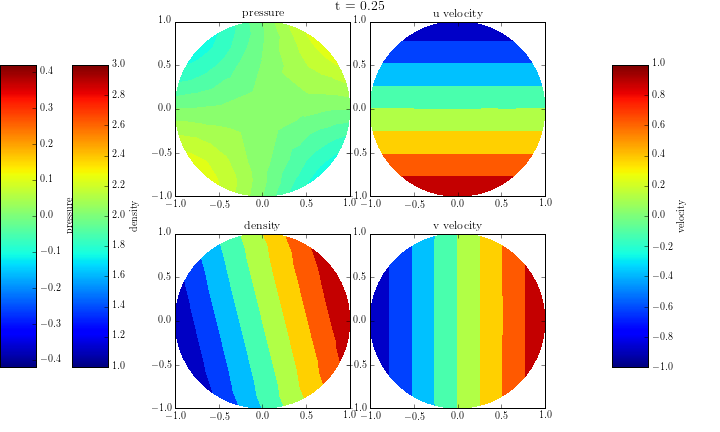
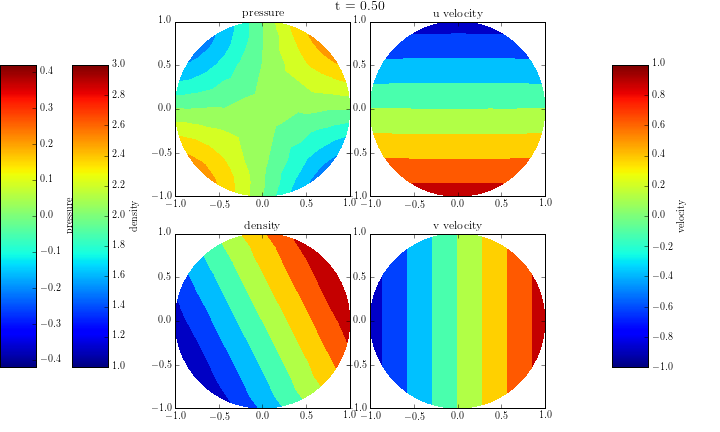
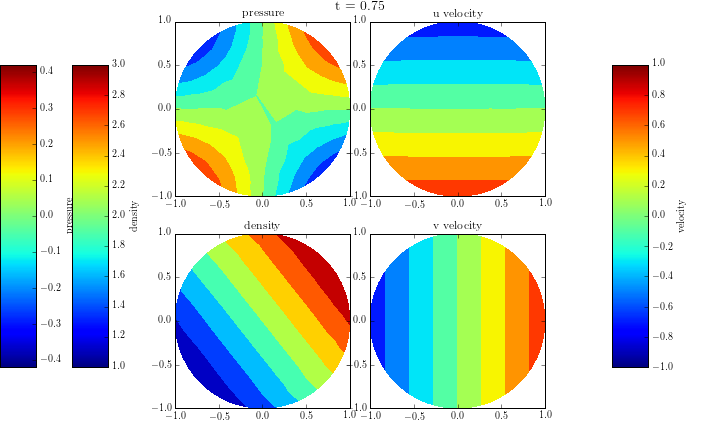
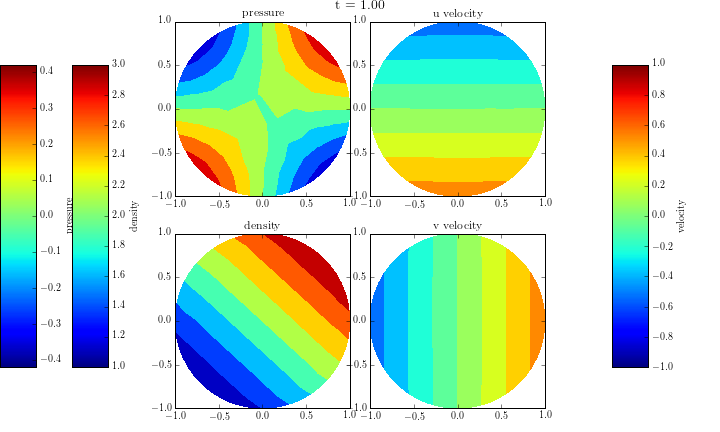
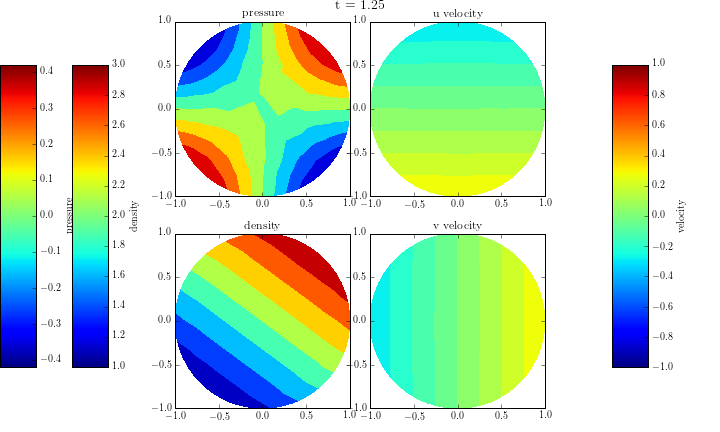
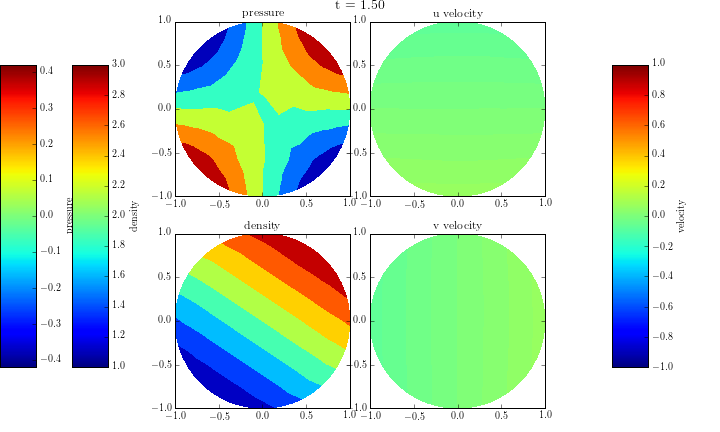
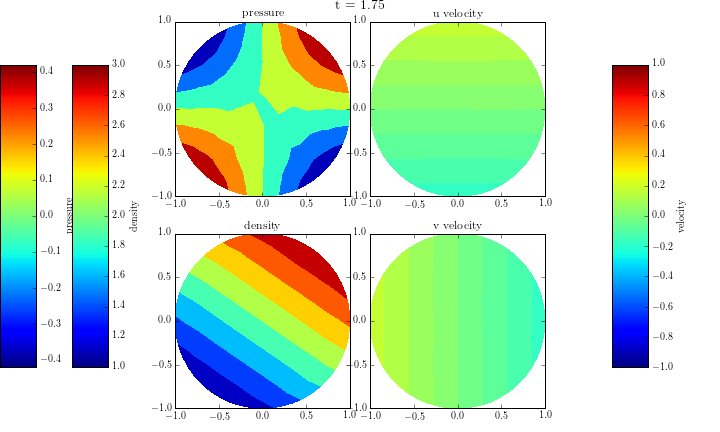
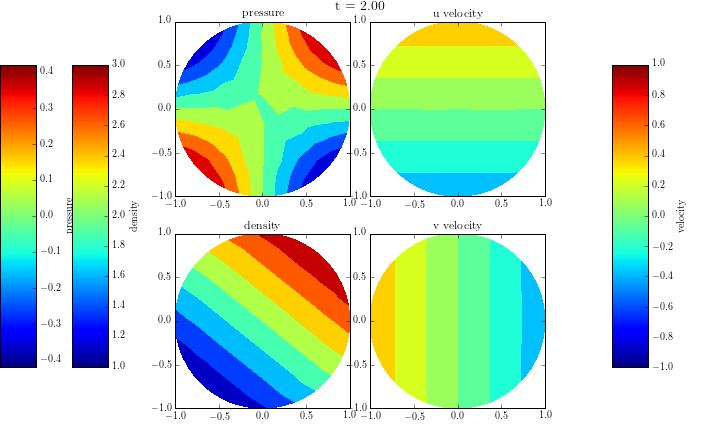
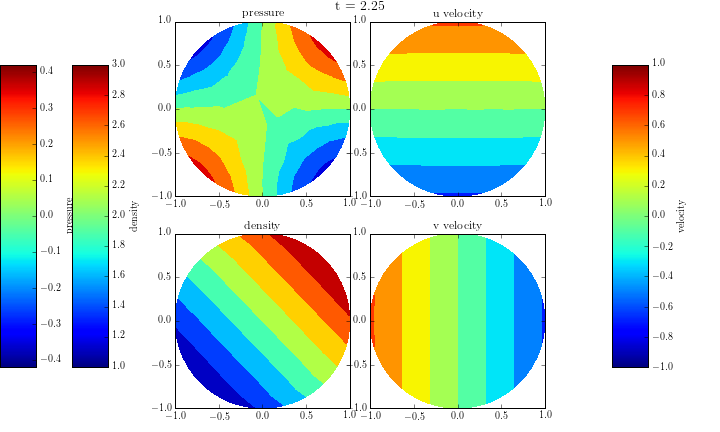
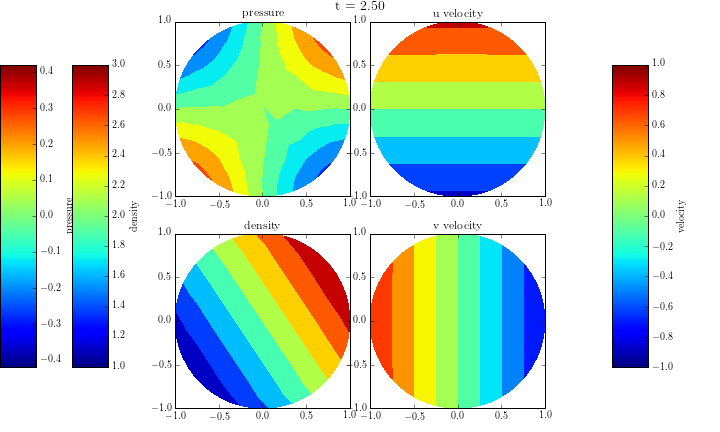
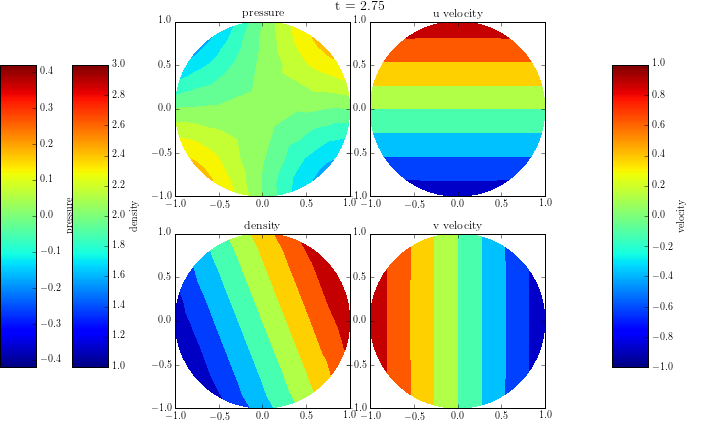
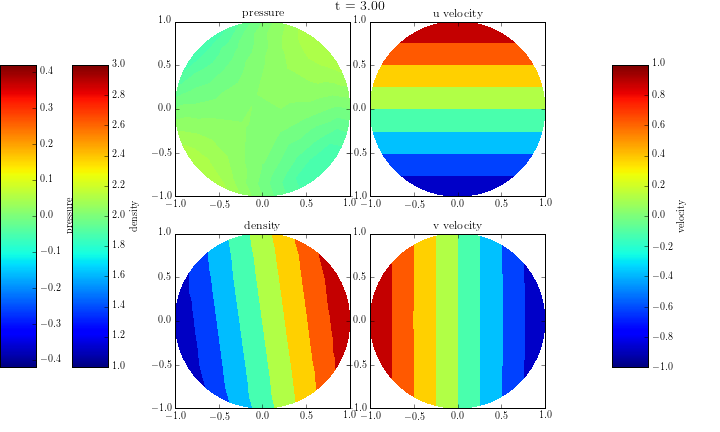
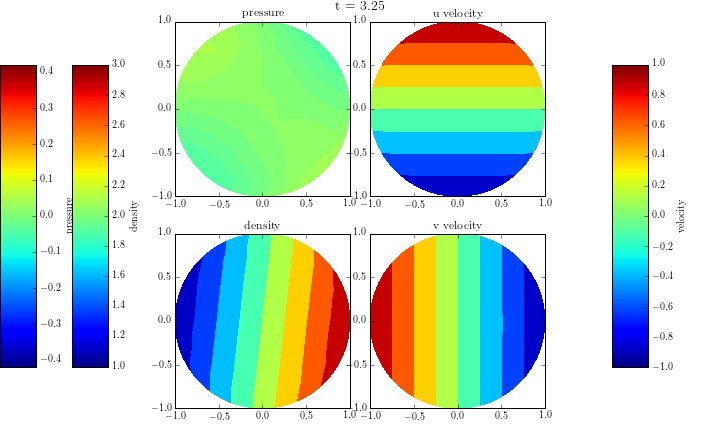
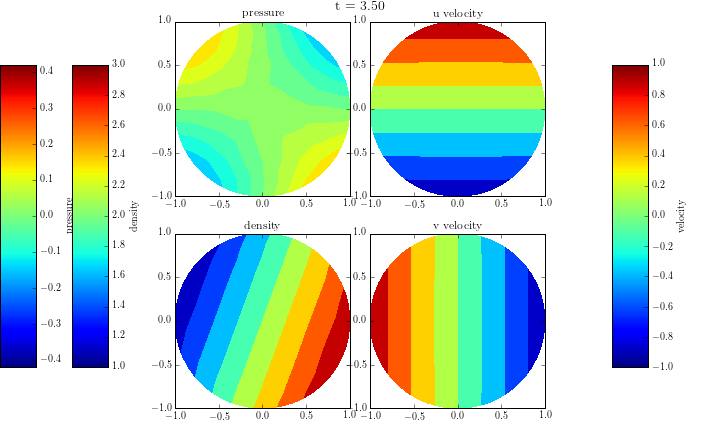
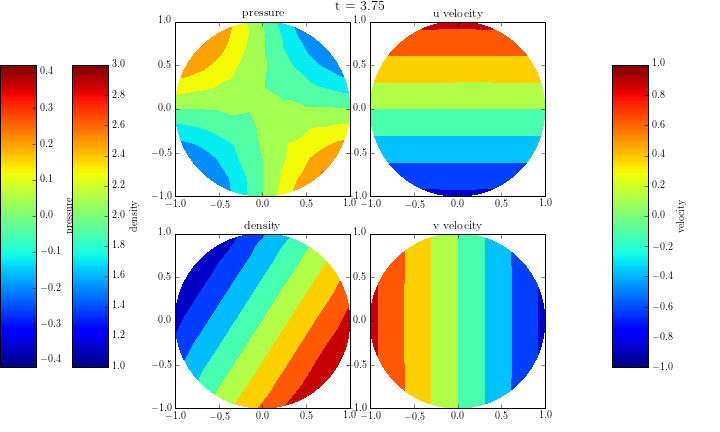
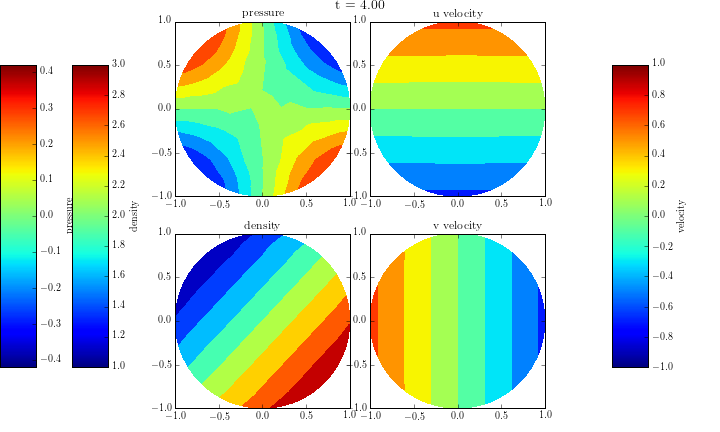
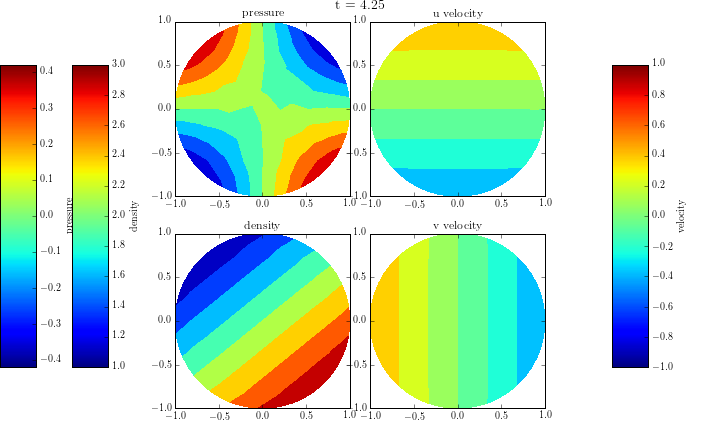
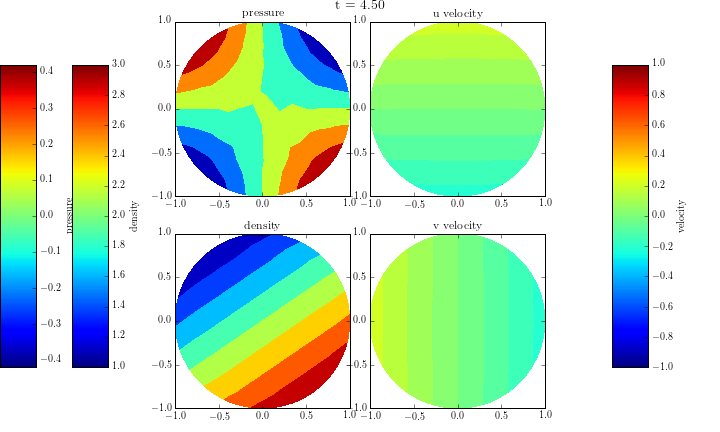
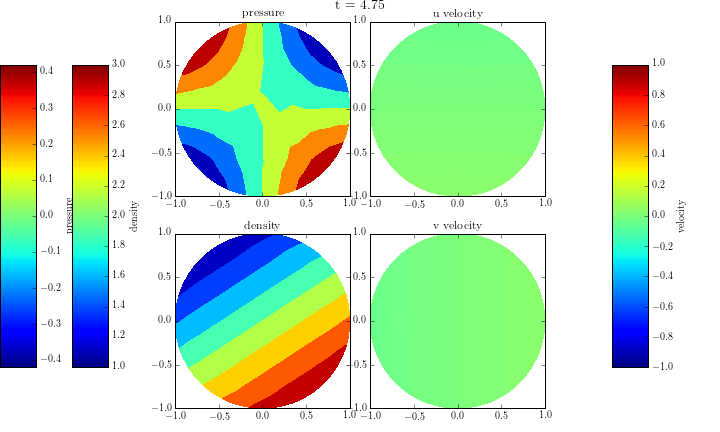
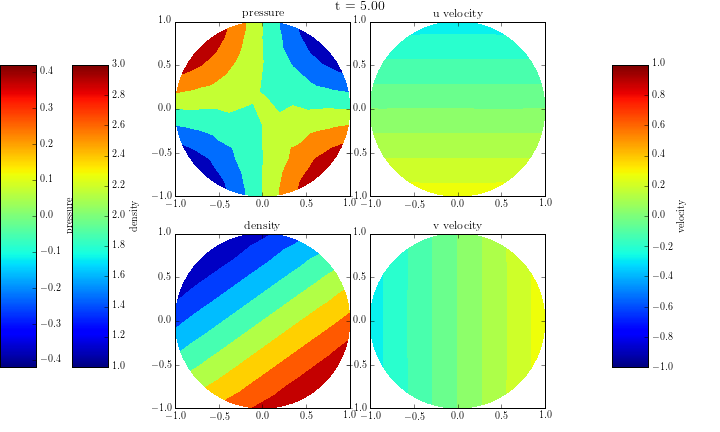
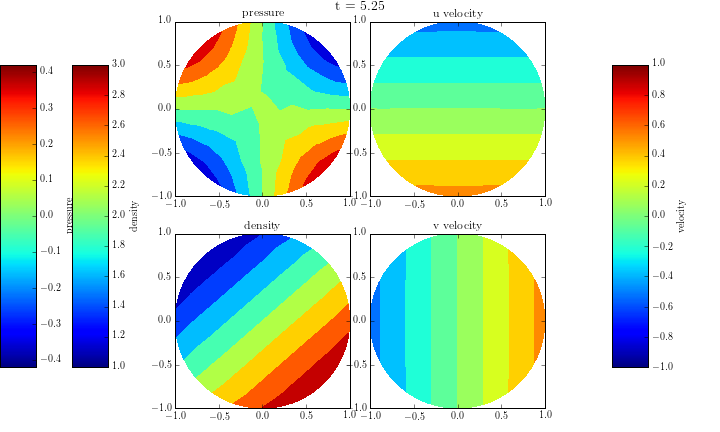
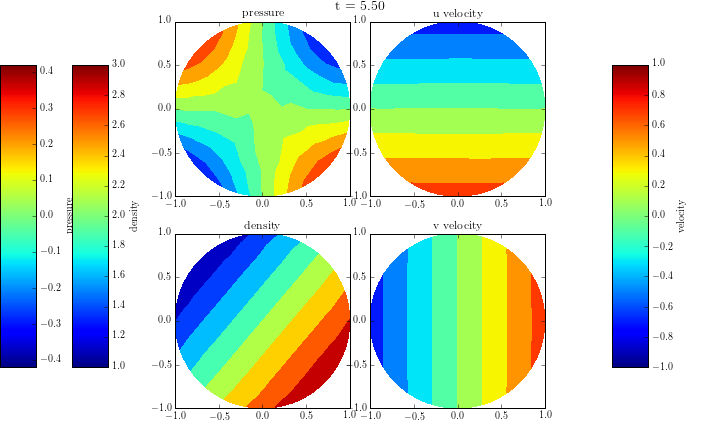
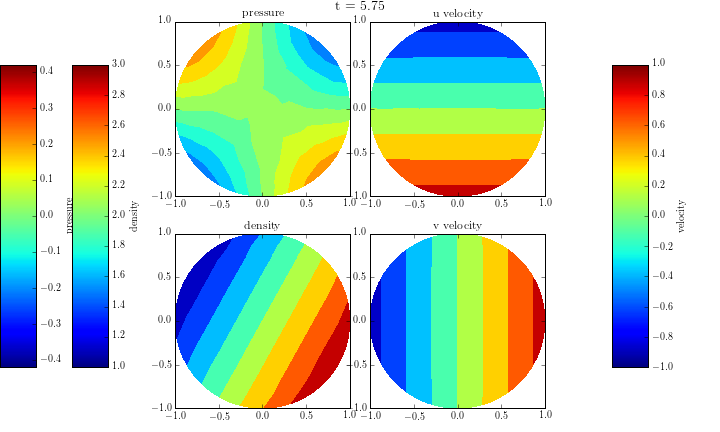
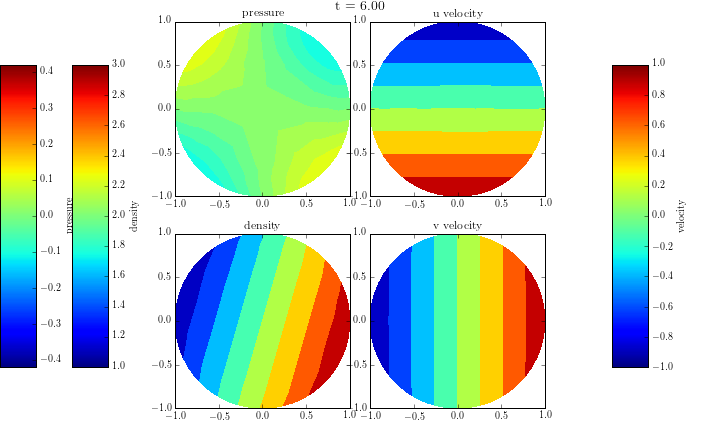
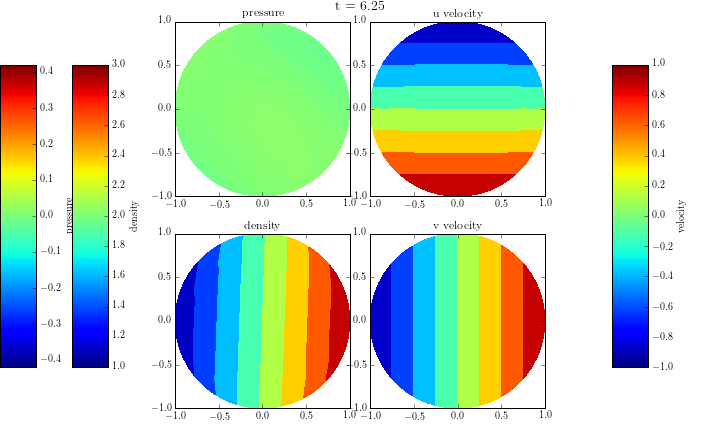
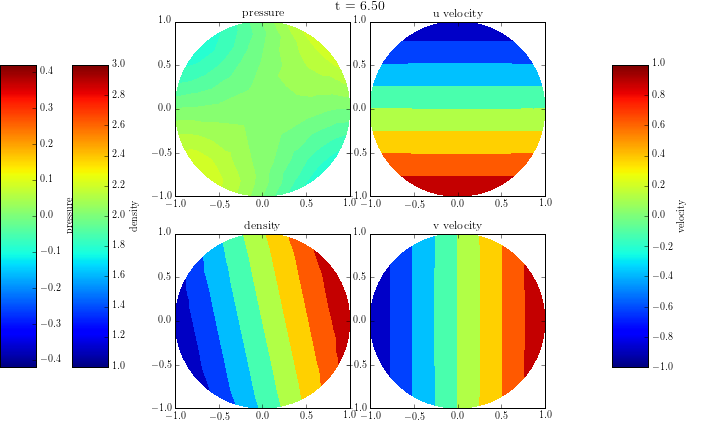
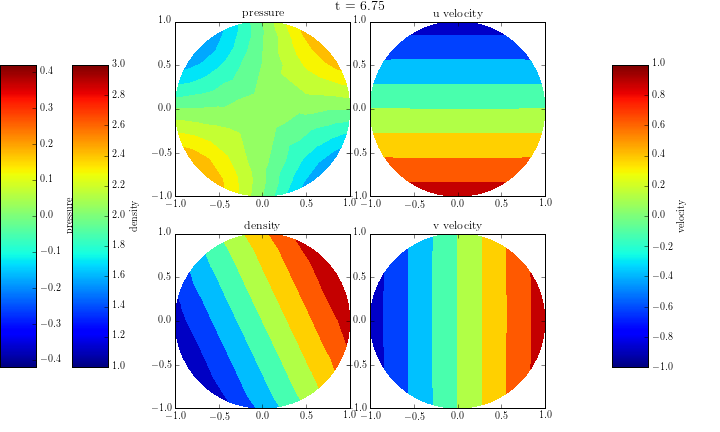
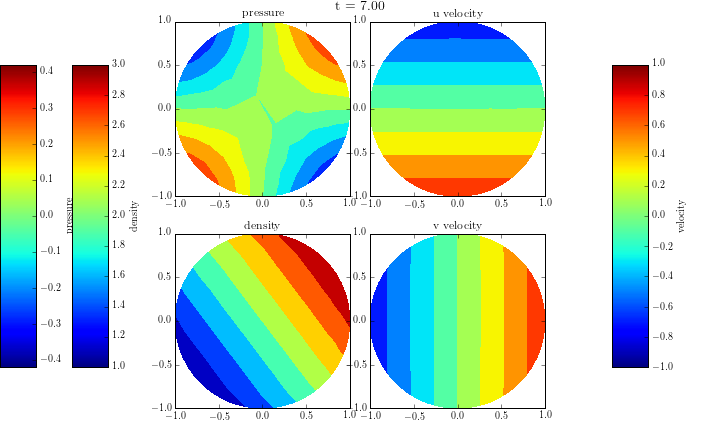
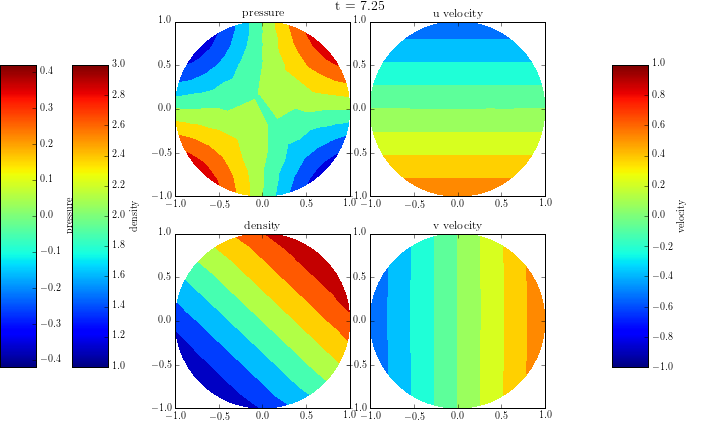
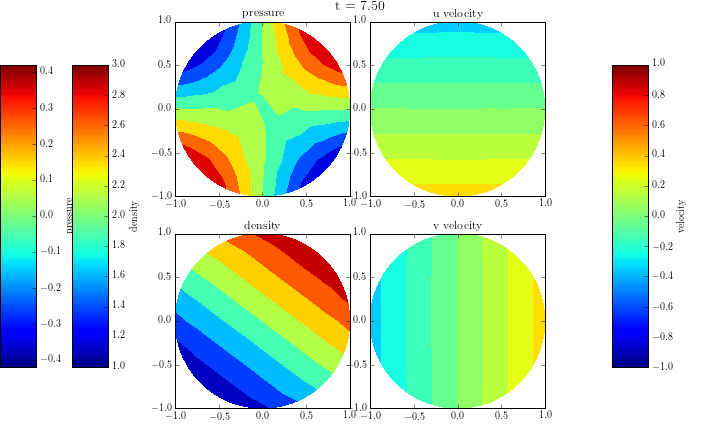
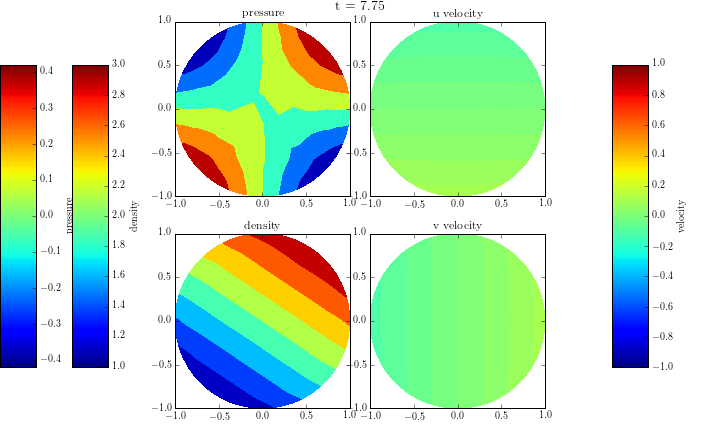
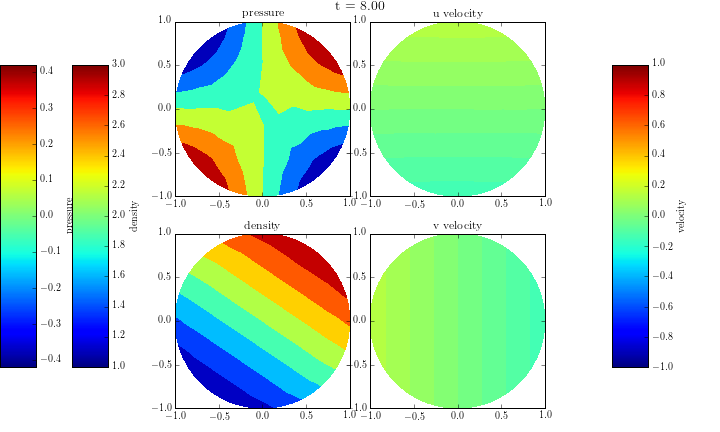
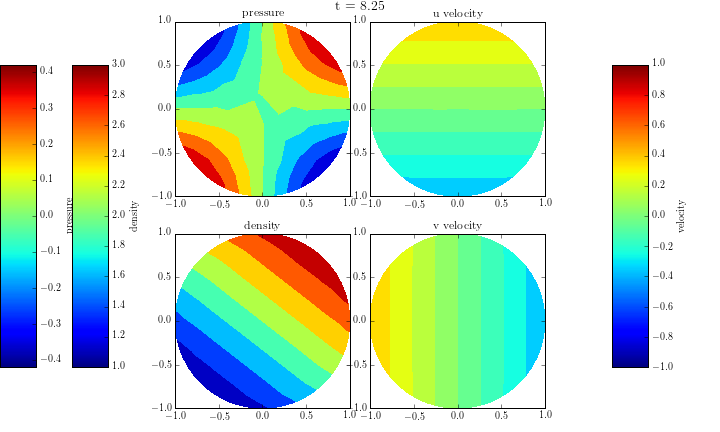
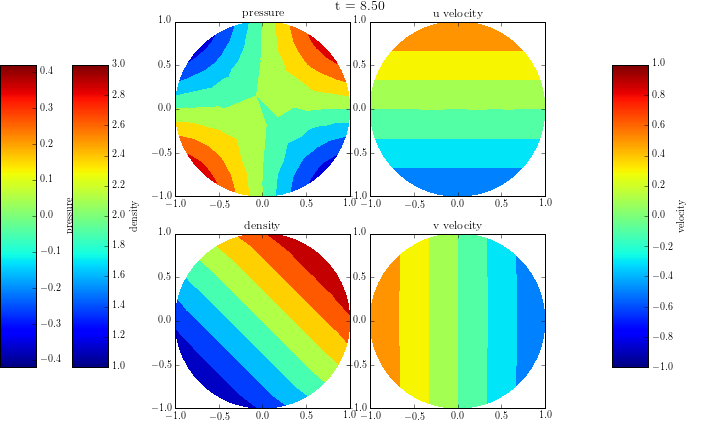
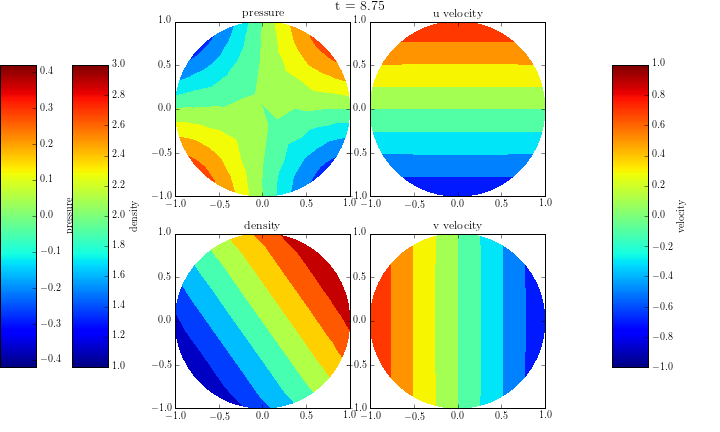
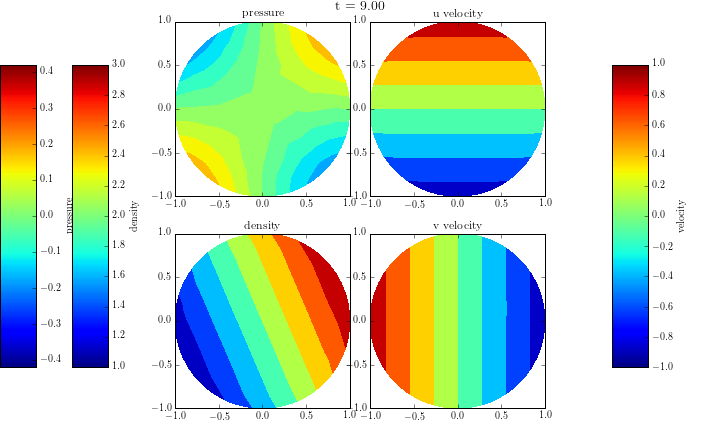
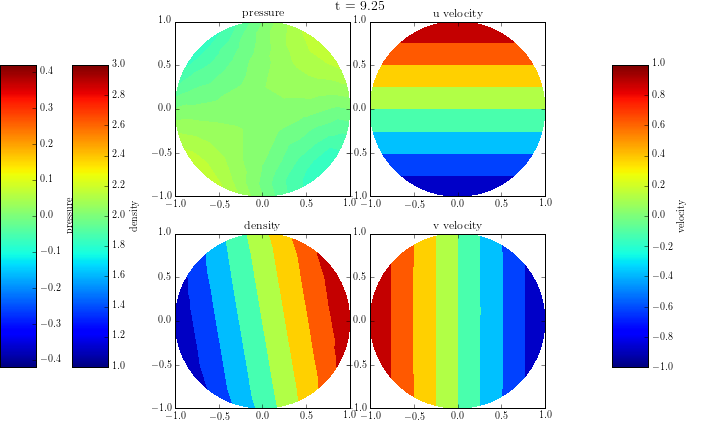
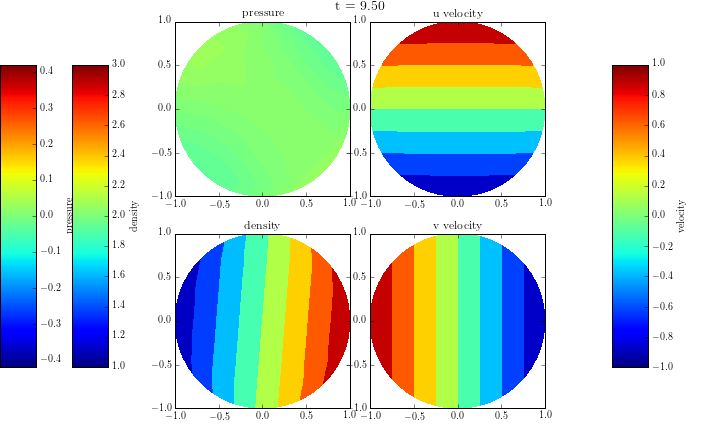
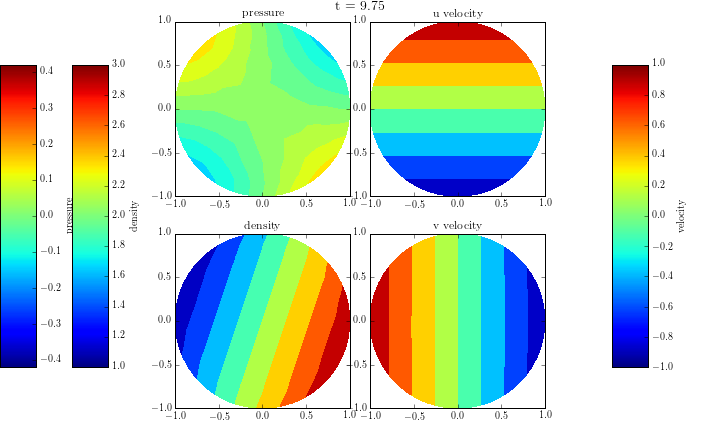
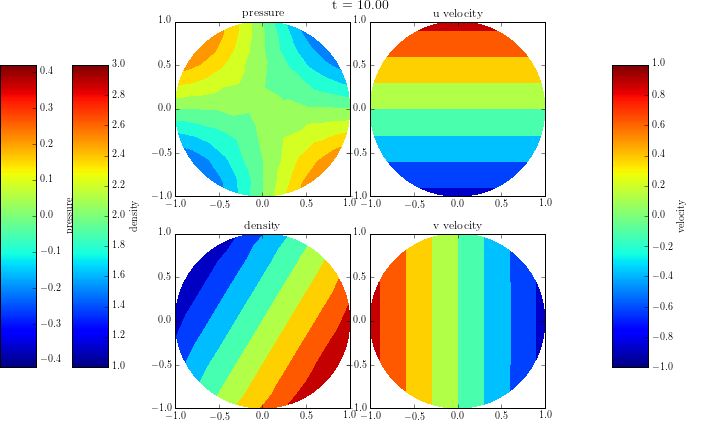

In [12]:
# setup initial figure spacing and create frames for input
fig = plt.figure(figsize=(10,6)) # w, h in inches

axp = fig.add_subplot(221)
axu = fig.add_subplot(222)
axv = fig.add_subplot(224)
axrho = fig.add_subplot(223)

axp.set_aspect('equal')
axu.set_aspect('equal')
axv.set_aspect('equal')
axrho.set_aspect('equal')

axp.set_title('pressure')
axu.set_title('u velocity')
axv.set_title('v velocity')
axrho.set_title('density')

fig.tight_layout() # spread out the plots so that they don't overlap

# adjust plots to make room for colorbars
fig.subplots_adjust(left=0.2,right=0.8,top=0.95)
cbar_ax_right = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax_farleft = fig.add_axes([0.0, 0.15, 0.05, 0.7]) #[left bottom width height]
cbar_ax_left = fig.add_axes([0.10, 0.15, 0.05, 0.7])

title = fig.suptitle("",x=0.5, y=1.00,
         horizontalalignment='center',
         fontsize=14,)

# normalization parameters for plots to make colors consistent across plots
norm_p = plt.Normalize(vmin=pressure_min,vmax=pressure_max)
norm_vel = plt.Normalize(vmin=velocity_min,vmax=velocity_max)
norm_rho = plt.Normalize(vmin=density_min,vmax=density_max)

# create scalar mappables that we will use for the colorbars to show entire range
# of colors instead of have them be autoscaled at each time step
#
# Thus the colorbars will be static instead of adapted to each shown plot
pfullrange = np.linspace(pressure_min,pressure_max,10)
vfullrange = np.linspace(velocity_min,velocity_max,10)
rhofullrange = np.linspace(density_min,density_max,10)

sm_p = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_p)
sm_p.set_array(pfullrange)

sm_vel = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_vel)
sm_vel.set_array(vfullrange)

sm_rho = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_rho)
sm_rho.set_array(rhofullrange)


def init():
    c_p = axp.plot([],[])
    c_rho = axrho.plot([],[])
    c_u = axu.plot([],[])
    c_v = axv.plot([],[])
    return (c_u,c_v,c_rho,c_p)


def animate(i):
    # time
    t = so.ctx.tnList[i]
    title.set_text("t = %.2f" %t)
    
    h5=openFile("guermond_example_variable_density_p0.h5","r")        
    triangles = h5.getNode("/elementsSpatial_Domain%i" %i)
    xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
    n = xvals.shape[0]

    p = h5.getNode("/p%i" %i)[:] 
    u = h5.getNode("/u%i" %i)[:n]
    v = h5.getNode("/v%i" %i)[:n]
    rho = h5.getNode("/rho%i" %i)[:n]
    
    c_p = axp.tricontourf(xvals[:,0],xvals[:,1], triangles, p, norm=norm_p)
    c_u = axu.tricontourf(xvals[:,0],xvals[:,1], triangles, u, norm=norm_vel)
    c_v = axv.tricontourf(xvals[:,0],xvals[:,1], triangles, v, norm=norm_vel)
    c_rho = axrho.tricontourf(xvals[:,0],xvals[:,1], triangles, rho, norm=norm_rho)
    
    cbar_p = fig.colorbar(sm_p,cax=cbar_ax_farleft, norm=norm_p)
    cbar_p.set_label("pressure")
    
    cbar_rho = fig.colorbar(sm_rho,cax=cbar_ax_left, norm=norm_rho)
    cbar_rho.set_label("density")
    
    cbar_vel = fig.colorbar(sm_vel, cax=cbar_ax_right, norm=norm_vel)
    cbar_vel.set_label("velocity")
    
    h5.close()
    plt.show() # force the legends and formatting to show up

    return (c_u,c_v,c_rho,c_p)

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=np.size(so.ctx.tnList), interval=30, blit=True) # 30 milliseconds between frames  